# Modeling pipeline

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import seaborn as sns

In [2]:
# first cell
from qbstyles import mpl_style

In [3]:
# second cell
mpl_style()

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
os.chdir('../..')
os.getcwd()

'/Users/viktoriia_oliinyk/Projects/gig_hackathon/qb-gig-052019-lon-team1'

In [6]:
data_dict = {
    "prm_aso": "data/prm_aso.csv",
    "prm_demographic": "data/prm_demographics.csv",
    "prm_event": "data/prm_events.csv",
    "prm_perpretator": "data/prm_perpretators.csv",
    "prm_service": "data/prm_services.csv",
    "prm_target": "data/prm_target.csv",
    "model_input": "data/model_input.csv"
}


In [122]:
model_input = pd.read_csv(data_dict["model_input"])

In [123]:
prm_target = pd.read_csv(data_dict["prm_target"])

## Taking first look at `model_input`

In [124]:
model_input.head()

,unique_participant_id,case_type,field_office,unique_case_id,gender,birth_year,state_of_current_location,state_of_origin,victim_relief_date,aftercare_initiated_date,aftercare_closed_date,avg_economic_empowerment_score_intake,avg_health_score_intake,avg_housing_score_intake,avg_mental_wellbeing_score_intake,avg_protection_score_intake,avg_social_support_score_intake,economic_empowerment_and_education_services_count,health_services_count,housing_services_count,mental_wellbeing_services_count,protection_services_count,support_system_services_count,economic_empowerment_and_education_events_count,health_events_count,housing_events_count,mental_wellbeing_events_count,protection_events_count,support_system_events_count,journey_cluster,closed_within_target,time_to_closure,low_aso,successful_closure,dropout
0,ACC-3-10,Forced Labor Trafficking,ACC,ACC-3,Male,2007.0,Unknown,Unknown,2015-03-24,2015-03-24,2017-02-13,2.0,3.0,2.0,3.0,1.0,1.5,7.0,5.0,NaN,1.0,4.0,3.0,30.0,6.0,14.0,4.0,NaN,NaN,flt_0,0.0,692.0,1.0,1,0.0
1,ACC-3-11,Forced Labor Trafficking,ACC,ACC-3,Male,1998.0,Unknown,Unknown,2015-03-24,2015-03-24,2017-08-21,2.0,3.0,2.0,3.0,3.0,2.5,12.0,5.0,NaN,1.0,4.0,1.0,32.0,7.0,14.0,4.0,NaN,NaN,flt_0,0.0,881.0,1.0,1,0.0
2,ACC-3-12,Forced Labor Trafficking,ACC,ACC-3,Male,1990.0,Unknown,Unknown,2015-03-24,2015-03-24,2017-05-16,1.0,2.0,1.0,2.0,1.0,1.0,5.0,5.0,NaN,3.0,4.0,1.0,31.0,6.0,13.0,4.0,NaN,NaN,flt_0,0.0,784.0,1.0,1,0.0
3,ACC-3-13,Forced Labor Trafficking,ACC,ACC-3,Male,2005.0,Unknown,Unknown,2015-03-24,2015-03-24,2017-09-27,1.0,1.0,1.0,3.0,1.0,1.0,2.0,5.0,NaN,1.0,6.0,NaN,29.0,8.0,16.0,4.0,NaN,NaN,flt_0,0.0,918.0,1.0,1,0.0
4,ACC-3-14,Forced Labor Trafficking,ACC,ACC-3,Male,2005.0,Unknown,Unknown,2015-03-24,2015-03-24,2017-04-26,1.0,1.0,1.0,2.0,1.0,1.0,6.0,6.0,NaN,2.0,12.0,2.0,30.0,6.0,15.0,4.0,NaN,NaN,flt_0,0.0,764.0,1.0,1,0.0


In [125]:
model_input.shape

(12357, 35)

In [126]:
current_year = 2019.0
model_input['age'] = current_year - model_input['birth_year']
model_input = model_input.drop('birth_year', axis=1)

### Numerical variables

In [127]:
numeric_cols = model_input.select_dtypes(include=['float64']).columns.tolist()
numeric_cols

['avg_economic_empowerment_score_intake',
 'avg_health_score_intake',
 'avg_housing_score_intake',
 'avg_mental_wellbeing_score_intake',
 'avg_protection_score_intake',
 'avg_social_support_score_intake',
 'economic_empowerment_and_education_services_count',
 'health_services_count',
 'housing_services_count',
 'mental_wellbeing_services_count',
 'protection_services_count',
 'support_system_services_count',
 'economic_empowerment_and_education_events_count',
 'health_events_count',
 'housing_events_count',
 'mental_wellbeing_events_count',
 'protection_events_count',
 'support_system_events_count',
 'closed_within_target',
 'time_to_closure',
 'low_aso',
 'dropout',
 'age']

In [128]:
model_input.select_dtypes(include=['float64']).head()

,avg_economic_empowerment_score_intake,avg_health_score_intake,avg_housing_score_intake,avg_mental_wellbeing_score_intake,avg_protection_score_intake,avg_social_support_score_intake,economic_empowerment_and_education_services_count,health_services_count,housing_services_count,mental_wellbeing_services_count,protection_services_count,support_system_services_count,economic_empowerment_and_education_events_count,health_events_count,housing_events_count,mental_wellbeing_events_count,protection_events_count,support_system_events_count,closed_within_target,time_to_closure,low_aso,dropout,age
0,2.0,3.0,2.0,3.0,1.0,1.5,7.0,5.0,NaN,1.0,4.0,3.0,30.0,6.0,14.0,4.0,NaN,NaN,0.0,692.0,1.0,0.0,12.0
1,2.0,3.0,2.0,3.0,3.0,2.5,12.0,5.0,NaN,1.0,4.0,1.0,32.0,7.0,14.0,4.0,NaN,NaN,0.0,881.0,1.0,0.0,21.0
2,1.0,2.0,1.0,2.0,1.0,1.0,5.0,5.0,NaN,3.0,4.0,1.0,31.0,6.0,13.0,4.0,NaN,NaN,0.0,784.0,1.0,0.0,29.0
3,1.0,1.0,1.0,3.0,1.0,1.0,2.0,5.0,NaN,1.0,6.0,NaN,29.0,8.0,16.0,4.0,NaN,NaN,0.0,918.0,1.0,0.0,14.0
4,1.0,1.0,1.0,2.0,1.0,1.0,6.0,6.0,NaN,2.0,12.0,2.0,30.0,6.0,15.0,4.0,NaN,NaN,0.0,764.0,1.0,0.0,14.0


In [129]:
for col in numeric_cols:
    display(model_input[col].describe())

count    3893.000000
mean        2.131091
std         0.573406
min         1.000000
25%         1.750000
50%         2.000000
75%         2.500000
max         4.000000
Name: avg_economic_empowerment_score_intake, dtype: float64

count    3893.000000
mean        2.389117
std         0.654048
min         1.000000
25%         2.000000
50%         2.333333
75%         3.000000
max         4.000000
Name: avg_health_score_intake, dtype: float64

count    3893.000000
mean        2.443724
std         0.672308
min         1.000000
25%         2.000000
50%         2.333333
75%         3.000000
max         4.000000
Name: avg_housing_score_intake, dtype: float64

count    3827.000000
mean        2.457068
std         0.598250
min         1.000000
25%         2.000000
50%         2.500000
75%         3.000000
max         4.000000
Name: avg_mental_wellbeing_score_intake, dtype: float64

count    3893.000000
mean        2.163726
std         0.546999
min         1.000000
25%         2.000000
50%         2.000000
75%         2.400000
max         4.000000
Name: avg_protection_score_intake, dtype: float64

count    3893.000000
mean        2.541013
std         0.607918
min         1.000000
25%         2.000000
50%         2.500000
75%         3.000000
max         4.000000
Name: avg_social_support_score_intake, dtype: float64

count    4758.000000
mean        2.008197
std         1.713238
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        20.000000
Name: economic_empowerment_and_education_services_count, dtype: float64

count    9418.000000
mean        2.572096
std         2.538052
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        34.000000
Name: health_services_count, dtype: float64

count    6980.000000
mean        1.640831
std         1.012783
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        14.000000
Name: housing_services_count, dtype: float64

count    6962.000000
mean        2.365987
std         1.384103
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        21.000000
Name: mental_wellbeing_services_count, dtype: float64

count    9965.000000
mean        3.853588
std         2.478761
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        28.000000
Name: protection_services_count, dtype: float64

count    2905.00000
mean        1.96420
std         1.71369
min         1.00000
25%         1.00000
50%         1.00000
75%         2.00000
max        17.00000
Name: support_system_services_count, dtype: float64

count    1175.000000
mean        5.133617
std         8.891836
min         1.000000
25%         1.000000
50%         2.000000
75%         6.000000
max       106.000000
Name: economic_empowerment_and_education_events_count, dtype: float64

count    841.000000
mean       5.246136
std        5.713398
min        1.000000
25%        1.000000
50%        3.000000
75%        8.000000
max       67.000000
Name: health_events_count, dtype: float64

count    442.000000
mean       7.126697
std       14.690064
min        1.000000
25%        1.000000
50%        2.000000
75%        6.000000
max      109.000000
Name: housing_events_count, dtype: float64

count    3991.000000
mean       10.253571
std        15.167745
min         1.000000
25%         2.000000
50%         4.000000
75%        12.000000
max       172.000000
Name: mental_wellbeing_events_count, dtype: float64

count    1038.000000
mean        3.965318
std         4.343580
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        35.000000
Name: protection_events_count, dtype: float64

count    1411.000000
mean        7.628632
std        15.499243
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       157.000000
Name: support_system_events_count, dtype: float64

count    11127.000000
mean         0.302058
std          0.711717
min         -1.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: closed_within_target, dtype: float64

count     9501.000000
mean       822.370593
std        612.196683
min          0.000000
25%        646.000000
50%        771.000000
75%        946.000000
max      40167.000000
Name: time_to_closure, dtype: float64

count    4901.000000
mean        0.537645
std         0.498632
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: low_aso, dtype: float64

count    10262.000000
mean         0.133405
std          0.340028
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: dropout, dtype: float64

count    10419.000000
mean        27.691813
std         45.462540
min          1.000000
25%         17.000000
50%         24.000000
75%         34.000000
max       2001.000000
Name: age, dtype: float64

/Users/viktoriia_oliinyk/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


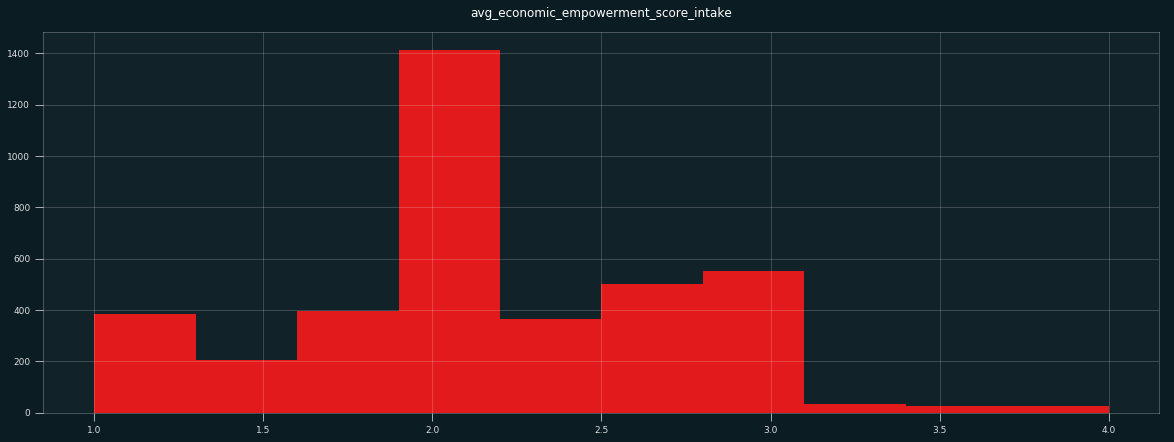

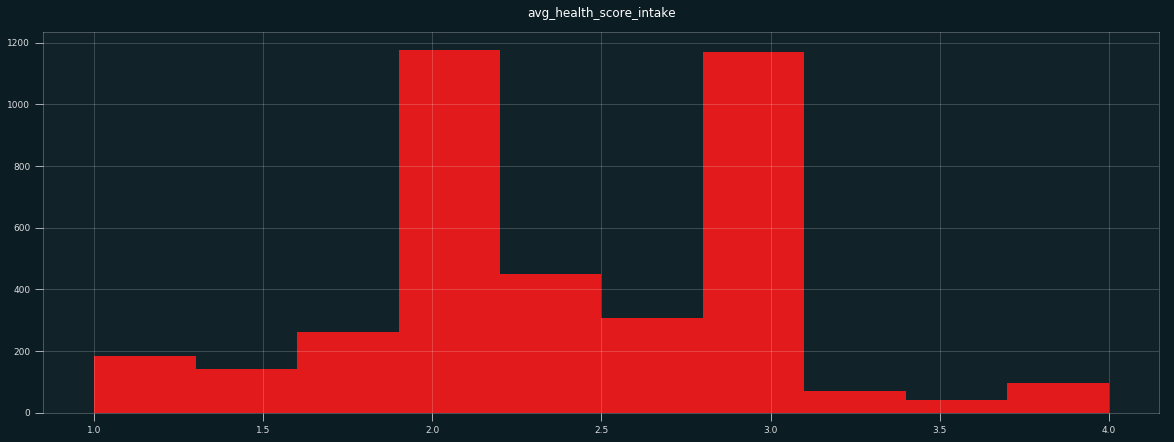

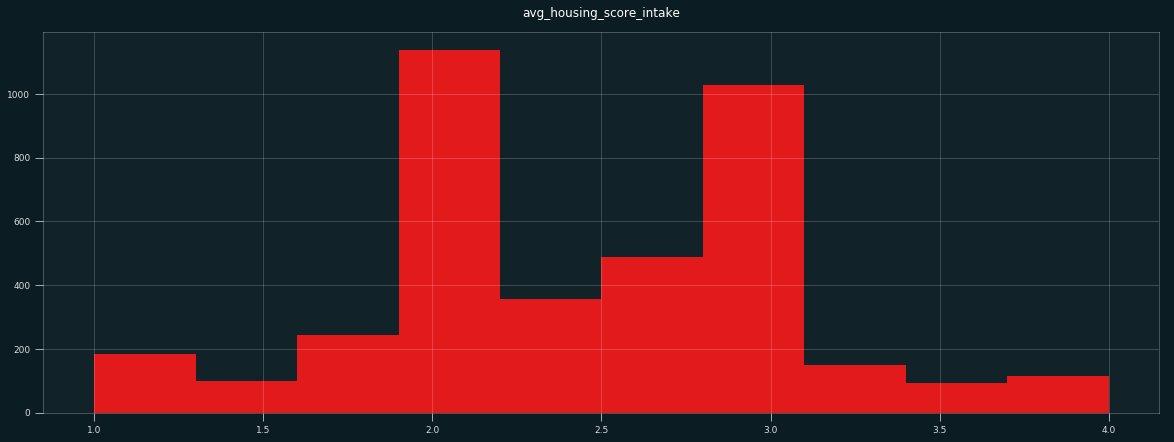

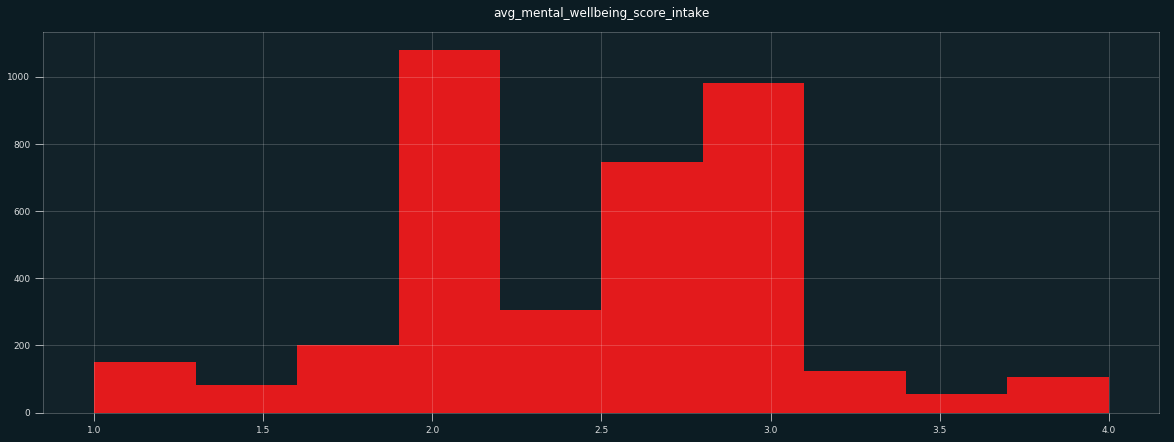

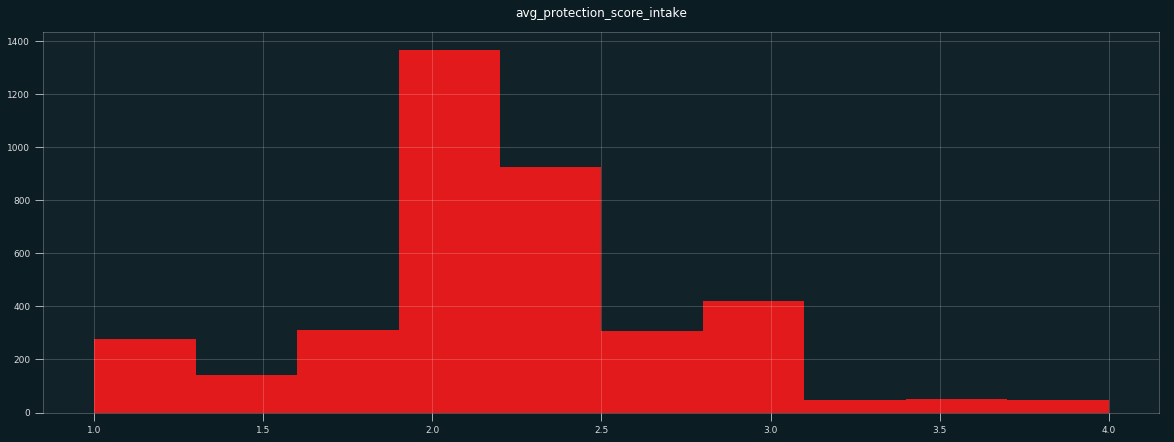

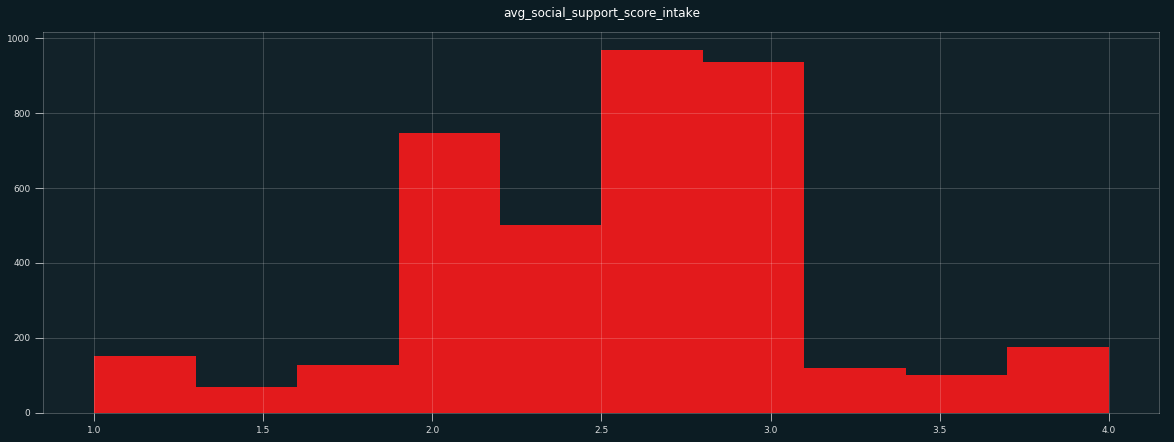

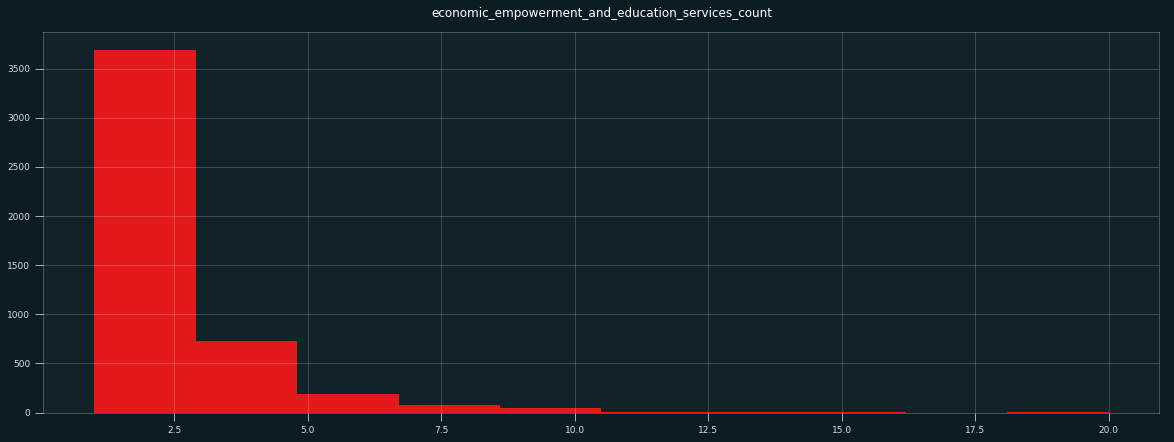

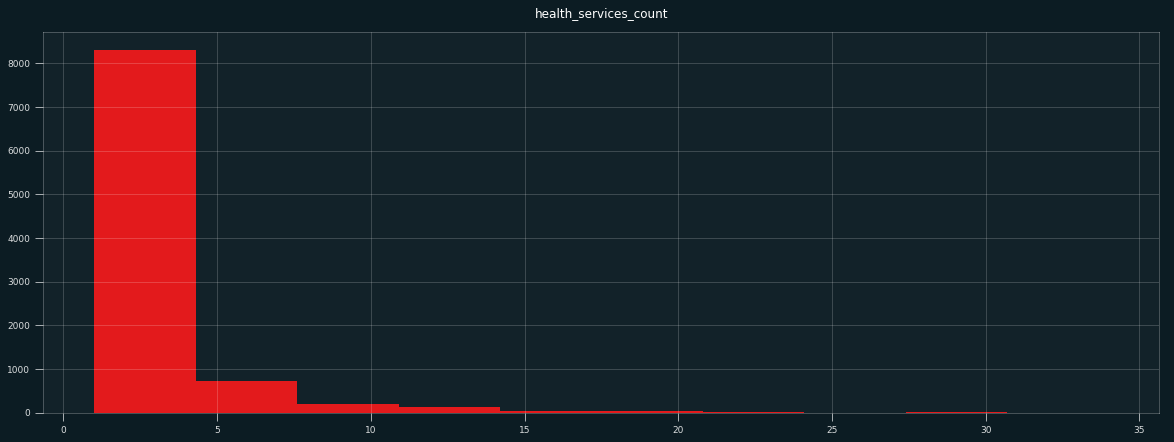

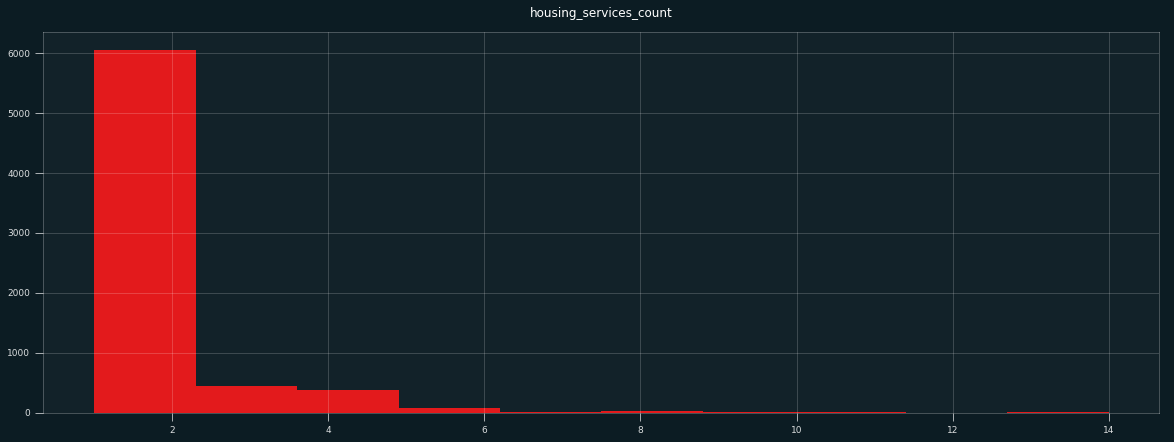

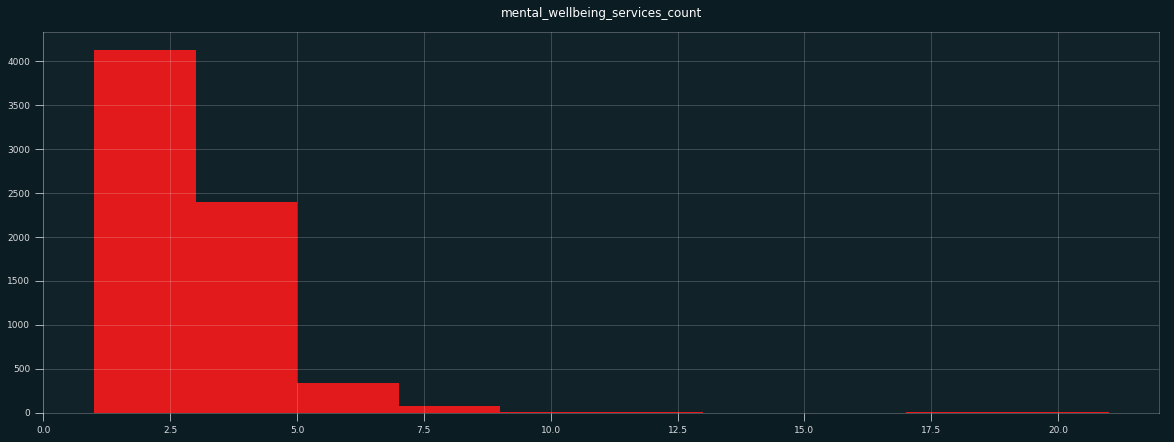

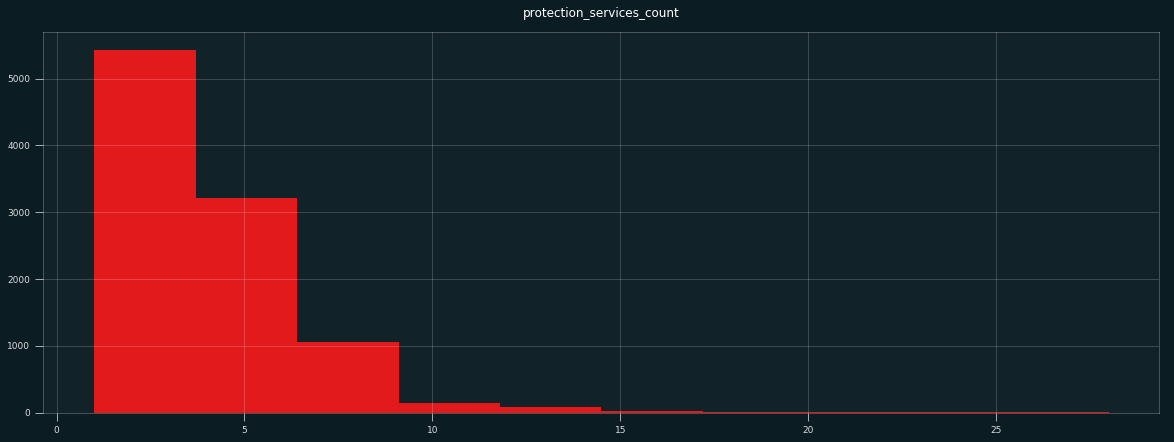

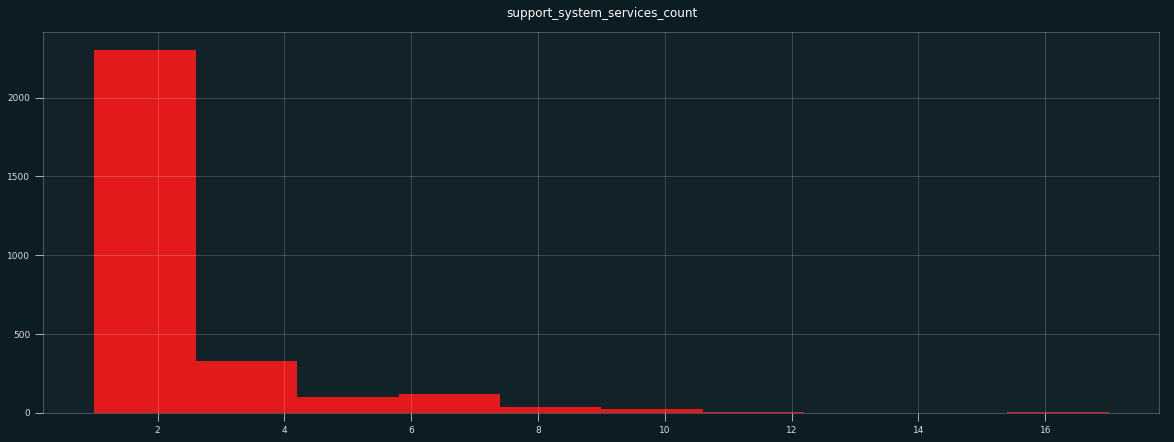

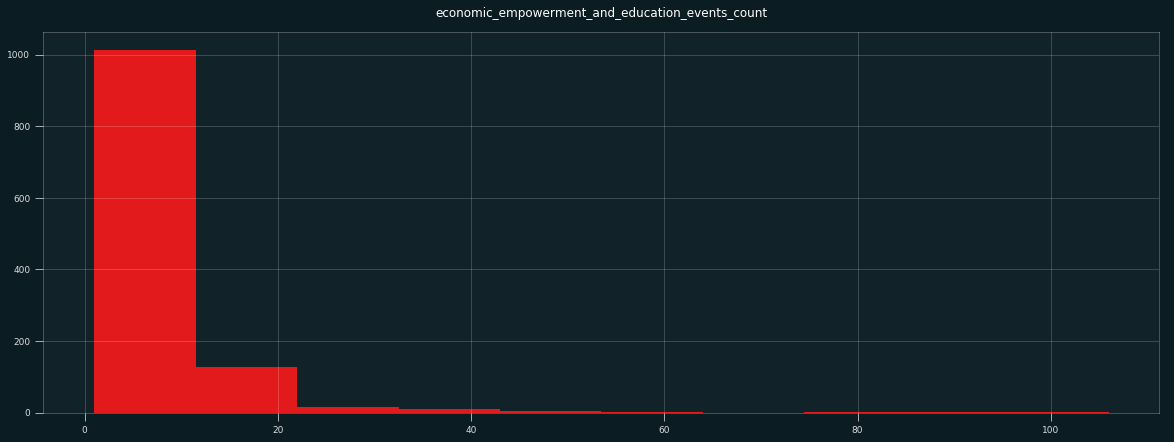

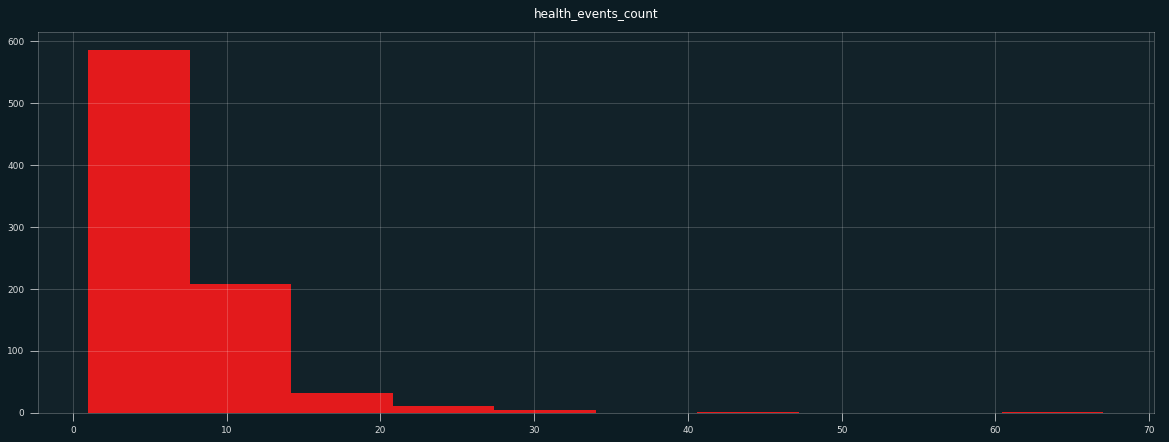

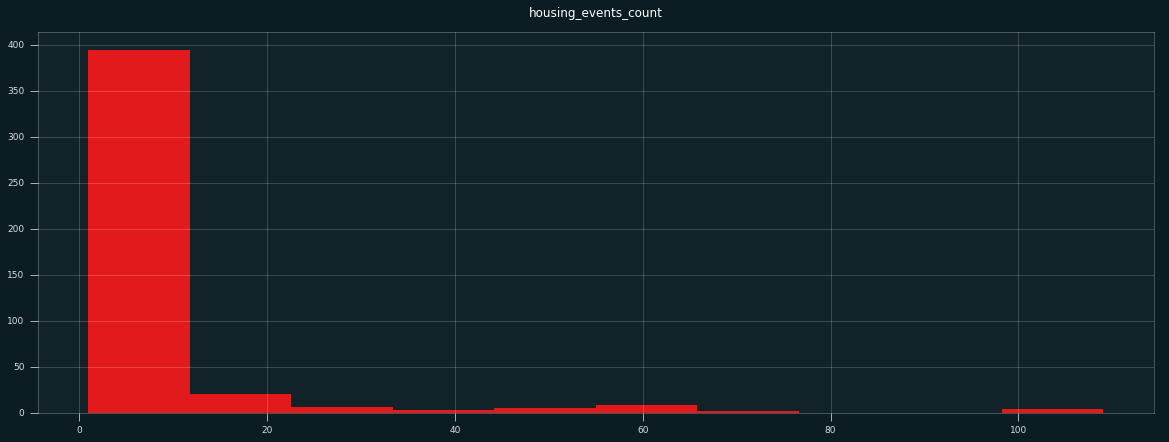

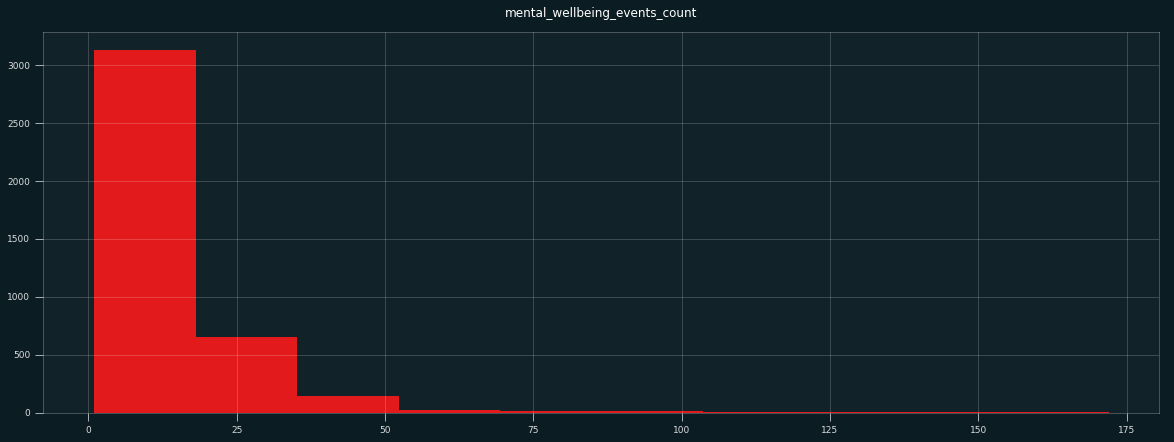

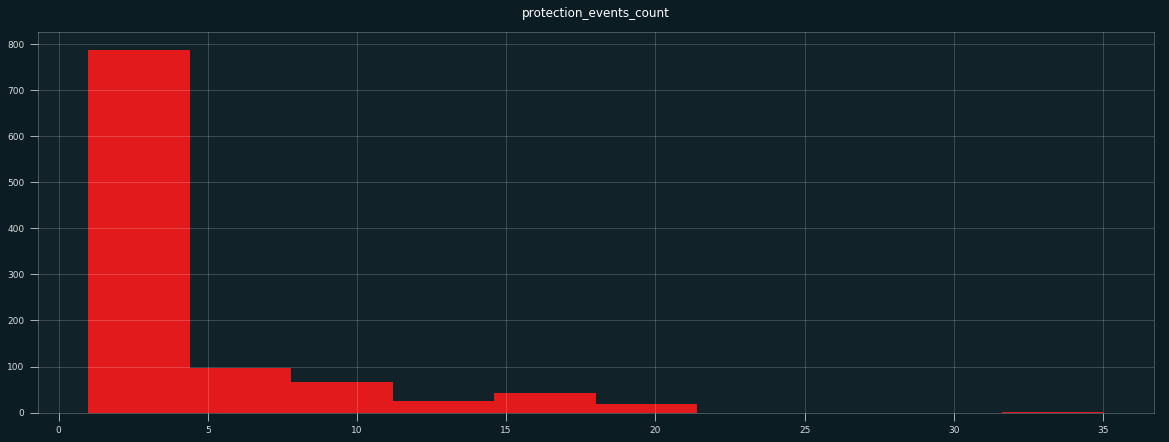

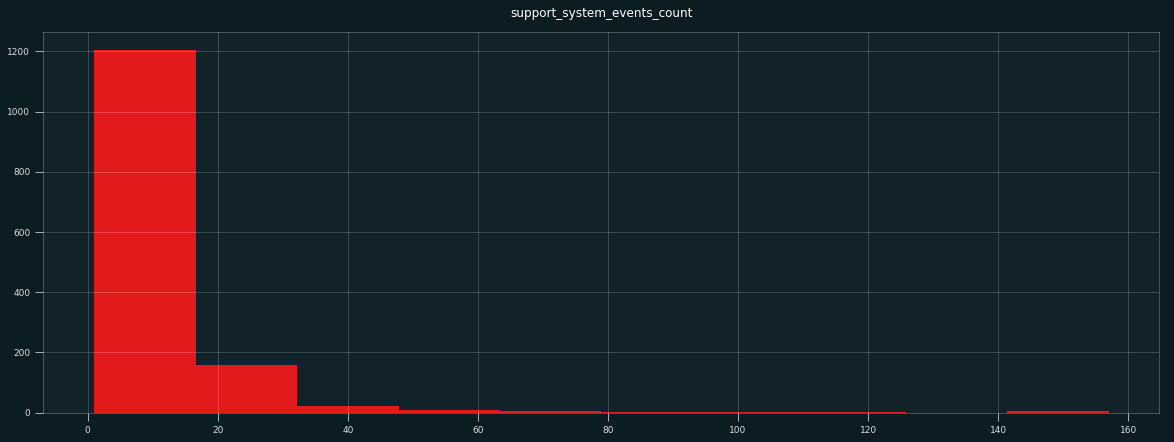

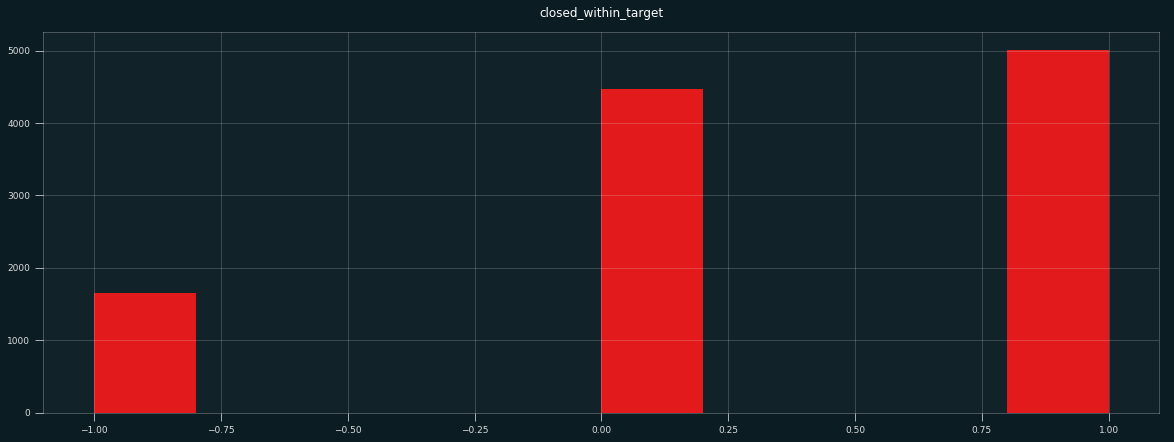

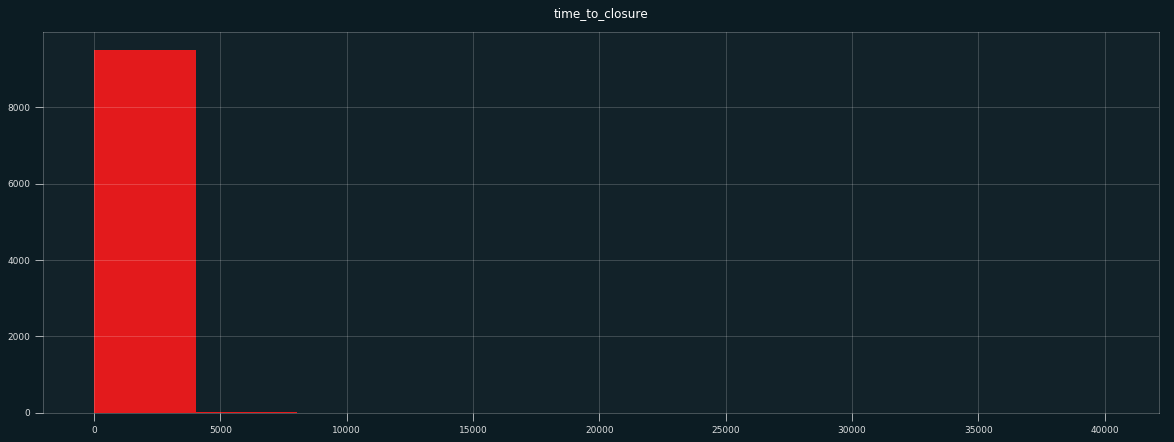

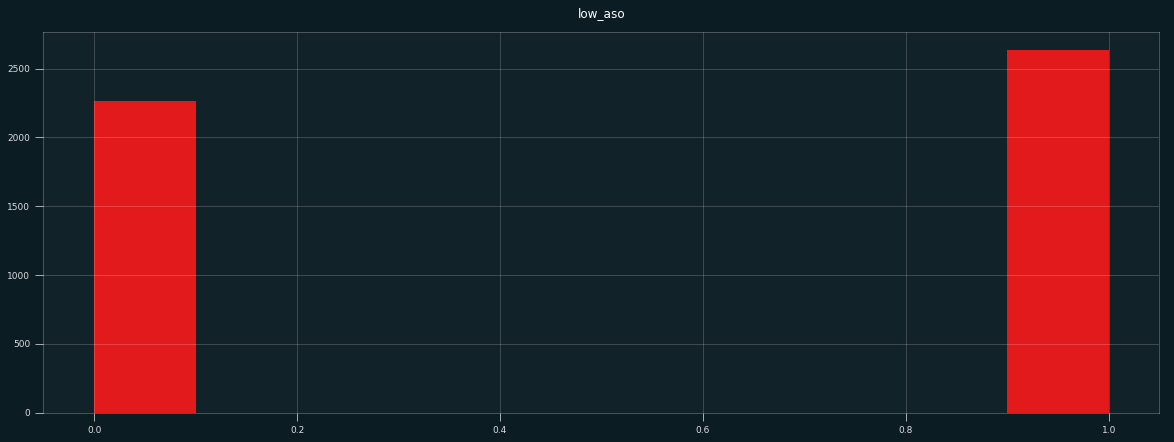

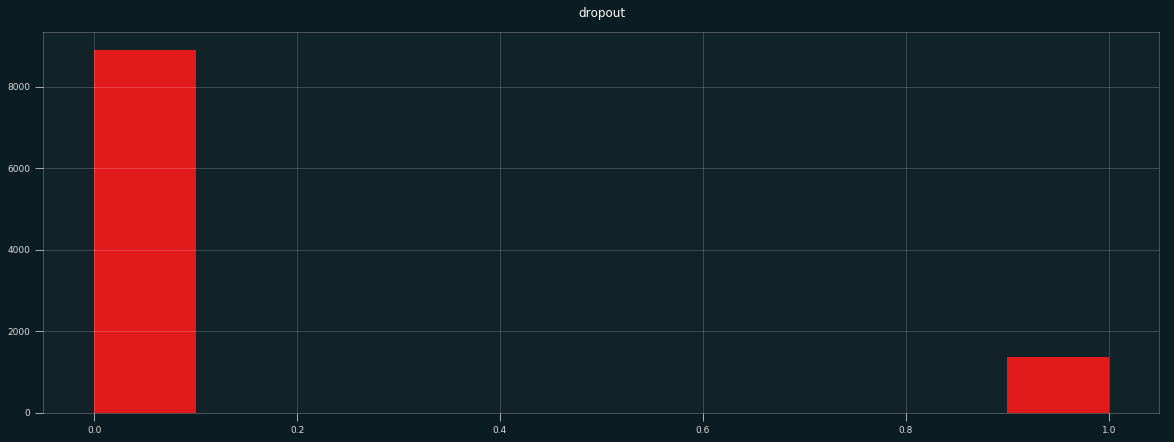

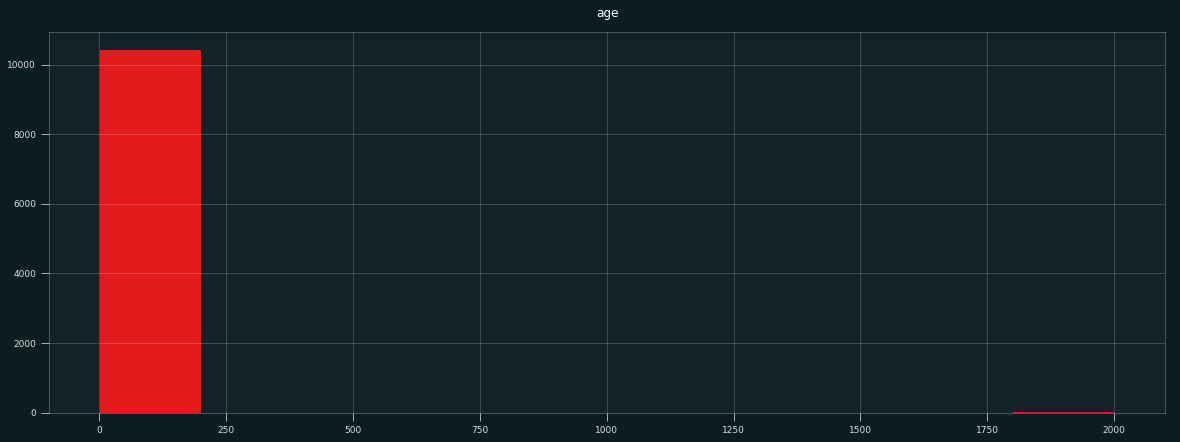

In [130]:
for col in numeric_cols:
    plt.figure()
    model_input[col].hist()
    plt.title(col)

### Categorical variables

In [131]:
categorical_cols = model_input.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['unique_participant_id',
 'case_type',
 'field_office',
 'unique_case_id',
 'gender',
 'state_of_current_location',
 'state_of_origin',
 'victim_relief_date',
 'aftercare_initiated_date',
 'aftercare_closed_date',
 'journey_cluster']

In [132]:
model_input.select_dtypes(include=['object']).head()

,unique_participant_id,case_type,field_office,unique_case_id,gender,state_of_current_location,state_of_origin,victim_relief_date,aftercare_initiated_date,aftercare_closed_date,journey_cluster
0,ACC-3-10,Forced Labor Trafficking,ACC,ACC-3,Male,Unknown,Unknown,2015-03-24,2015-03-24,2017-02-13,flt_0
1,ACC-3-11,Forced Labor Trafficking,ACC,ACC-3,Male,Unknown,Unknown,2015-03-24,2015-03-24,2017-08-21,flt_0
2,ACC-3-12,Forced Labor Trafficking,ACC,ACC-3,Male,Unknown,Unknown,2015-03-24,2015-03-24,2017-05-16,flt_0
3,ACC-3-13,Forced Labor Trafficking,ACC,ACC-3,Male,Unknown,Unknown,2015-03-24,2015-03-24,2017-09-27,flt_0
4,ACC-3-14,Forced Labor Trafficking,ACC,ACC-3,Male,Unknown,Unknown,2015-03-24,2015-03-24,2017-04-26,flt_0


unique_participant_id has more than 100 categories
unique_case_id has more than 100 categories
victim_relief_date has more than 100 categories
aftercare_initiated_date has more than 100 categories
aftercare_closed_date has more than 100 categories


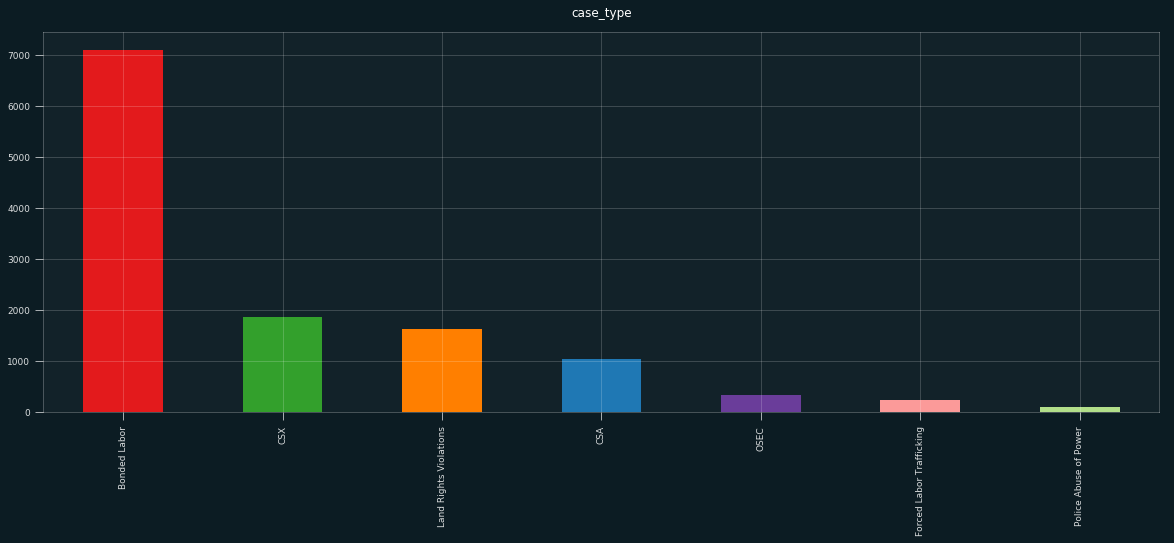

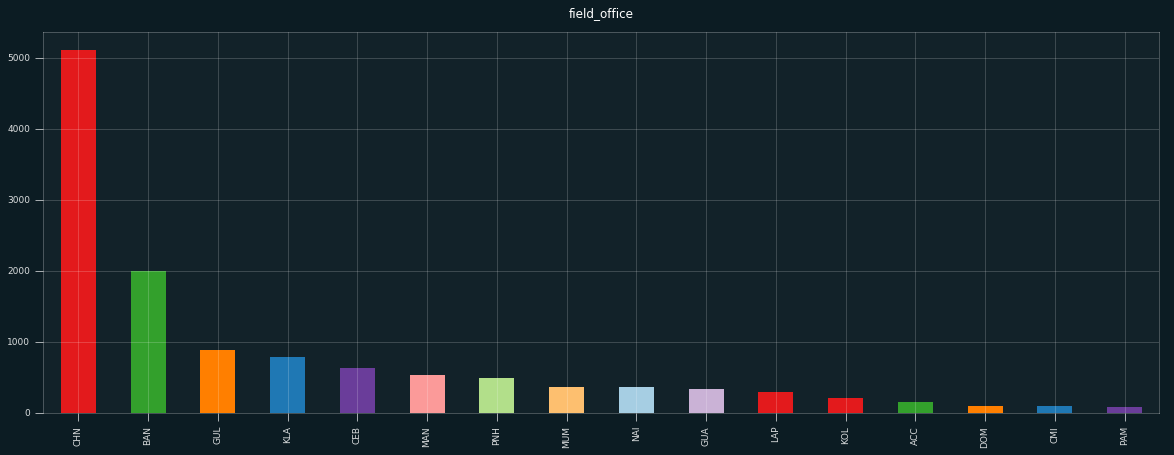

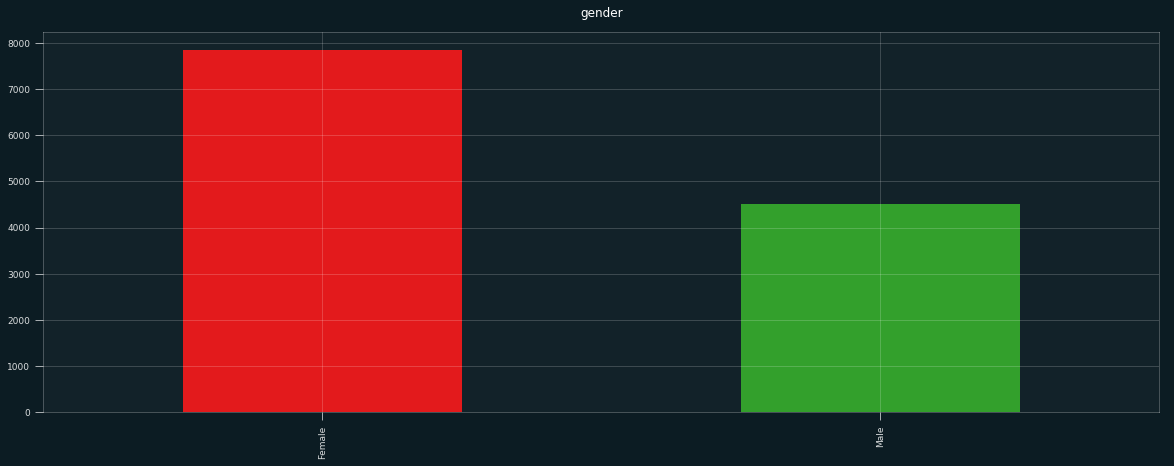

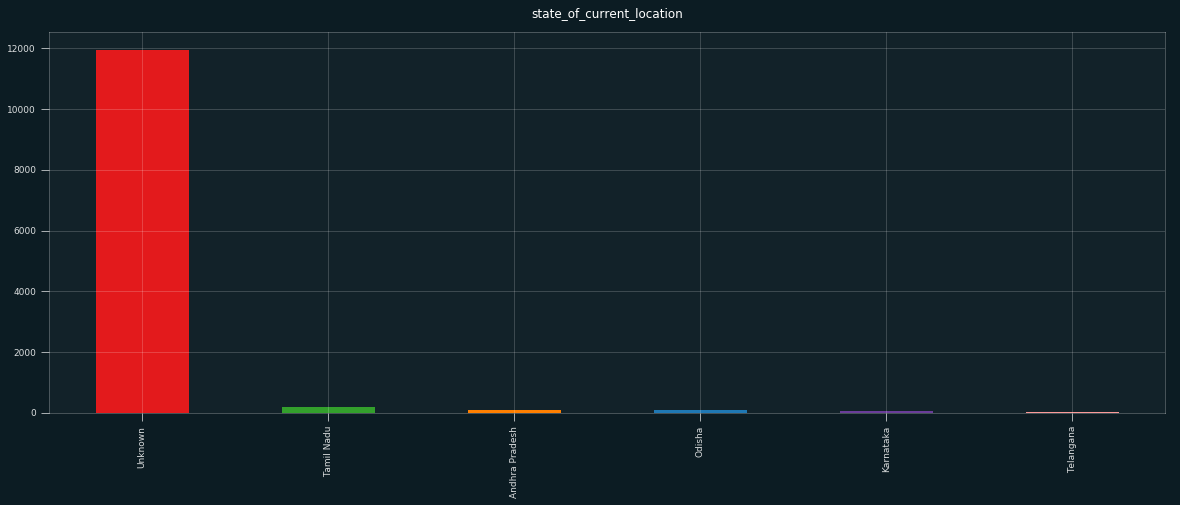

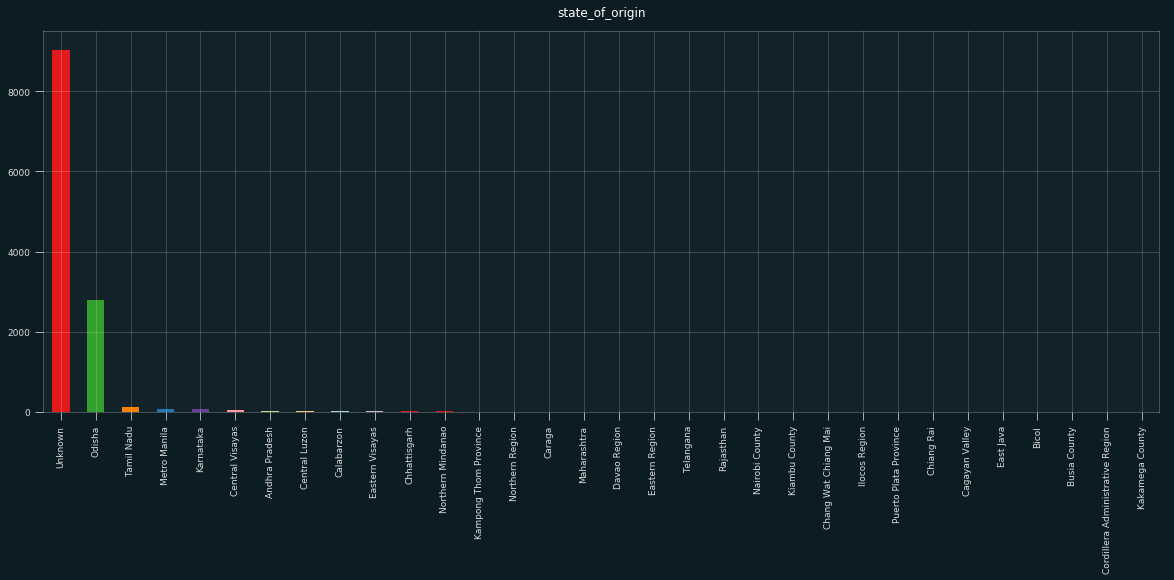

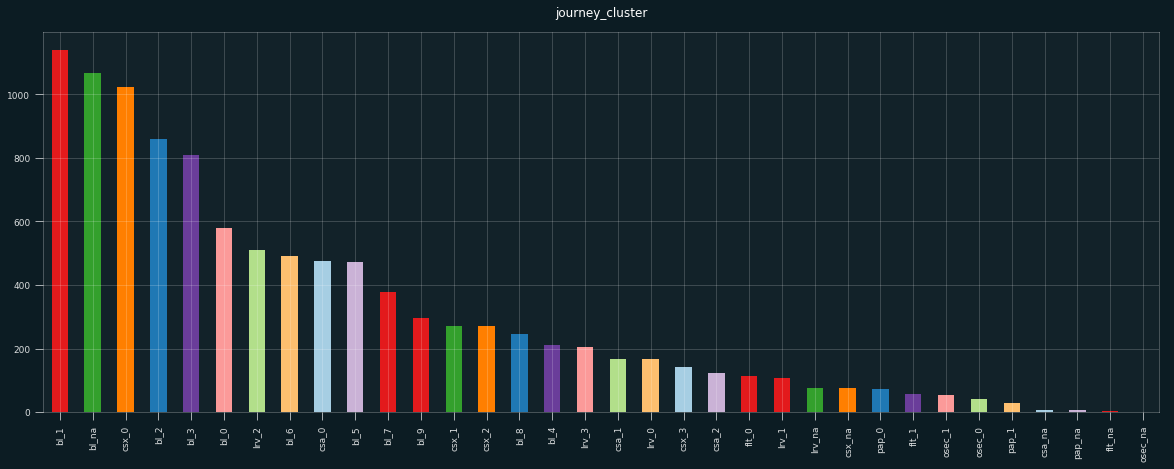

In [133]:
threshold = 100
for col in categorical_cols:
    if len(model_input[col].unique()) < threshold:
        plt.figure()
        model_input[col].value_counts().plot(kind='bar')
        plt.title(col)
    else:
        print(col + ' has more than ' + str(threshold) + ' categories')

## Data preprocessing

### Addressing missings

In [134]:
model_input.loc[model_input['state_of_current_location'] == 'Unknown', 'state_of_current_location'] = np.nan
model_input.loc[model_input['state_of_origin'] == 'Unknown', 'state_of_origin'] = np.nan

In [135]:
from pylab import rcParams
rcParams['figure.figsize'] = 13, 7

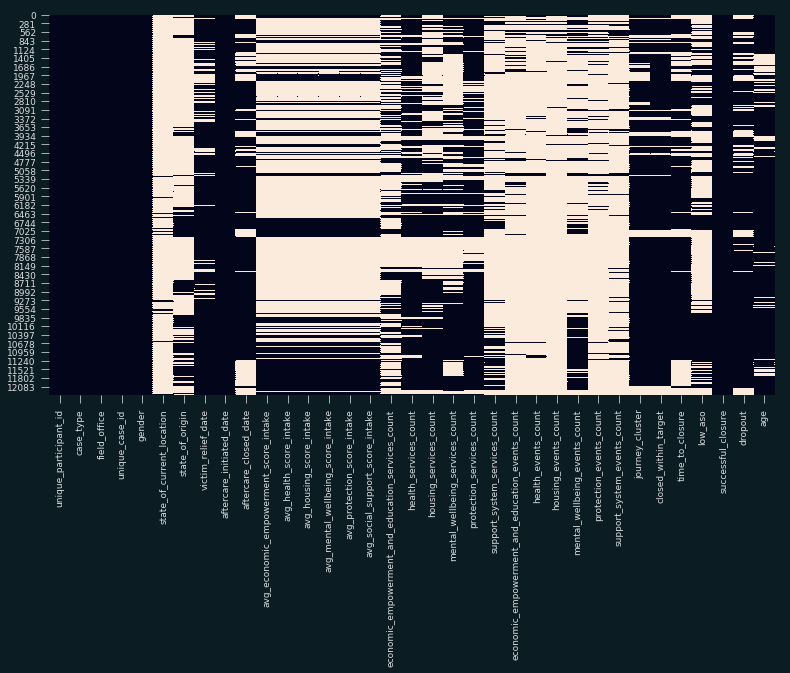

In [136]:
sns.heatmap(model_input.isnull(), cbar=False)

For events-based features, missings can be replaced with 0

In [137]:
model_input.columns.tolist()

['unique_participant_id',
 'case_type',
 'field_office',
 'unique_case_id',
 'gender',
 'state_of_current_location',
 'state_of_origin',
 'victim_relief_date',
 'aftercare_initiated_date',
 'aftercare_closed_date',
 'avg_economic_empowerment_score_intake',
 'avg_health_score_intake',
 'avg_housing_score_intake',
 'avg_mental_wellbeing_score_intake',
 'avg_protection_score_intake',
 'avg_social_support_score_intake',
 'economic_empowerment_and_education_services_count',
 'health_services_count',
 'housing_services_count',
 'mental_wellbeing_services_count',
 'protection_services_count',
 'support_system_services_count',
 'economic_empowerment_and_education_events_count',
 'health_events_count',
 'housing_events_count',
 'mental_wellbeing_events_count',
 'protection_events_count',
 'support_system_events_count',
 'journey_cluster',
 'closed_within_target',
 'time_to_closure',
 'low_aso',
 'successful_closure',
 'dropout',
 'age']

In [138]:
model_input_res = model_input.copy()

In [139]:
events_cols = ['economic_empowerment_and_education_events_count',
             'health_events_count',
             'housing_events_count',
             'mental_wellbeing_events_count',
             'protection_events_count',
             'support_system_events_count']
services_cols = ['economic_empowerment_and_education_services_count',
             'health_services_count',
             'housing_services_count',
             'mental_wellbeing_services_count',
             'protection_services_count',
             'support_system_services_count',
]
model_input[events_cols + services_cols] = model_input[events_cols + services_cols].fillna(0)

In [140]:
model_input.head()

,unique_participant_id,case_type,field_office,unique_case_id,gender,state_of_current_location,state_of_origin,victim_relief_date,aftercare_initiated_date,aftercare_closed_date,avg_economic_empowerment_score_intake,avg_health_score_intake,avg_housing_score_intake,avg_mental_wellbeing_score_intake,avg_protection_score_intake,avg_social_support_score_intake,economic_empowerment_and_education_services_count,health_services_count,housing_services_count,mental_wellbeing_services_count,protection_services_count,support_system_services_count,economic_empowerment_and_education_events_count,health_events_count,housing_events_count,mental_wellbeing_events_count,protection_events_count,support_system_events_count,journey_cluster,closed_within_target,time_to_closure,low_aso,successful_closure,dropout,age
0,ACC-3-10,Forced Labor Trafficking,ACC,ACC-3,Male,NaN,NaN,2015-03-24,2015-03-24,2017-02-13,2.0,3.0,2.0,3.0,1.0,1.5,7.0,5.0,0.0,1.0,4.0,3.0,30.0,6.0,14.0,4.0,0.0,0.0,flt_0,0.0,692.0,1.0,1,0.0,12.0
1,ACC-3-11,Forced Labor Trafficking,ACC,ACC-3,Male,NaN,NaN,2015-03-24,2015-03-24,2017-08-21,2.0,3.0,2.0,3.0,3.0,2.5,12.0,5.0,0.0,1.0,4.0,1.0,32.0,7.0,14.0,4.0,0.0,0.0,flt_0,0.0,881.0,1.0,1,0.0,21.0
2,ACC-3-12,Forced Labor Trafficking,ACC,ACC-3,Male,NaN,NaN,2015-03-24,2015-03-24,2017-05-16,1.0,2.0,1.0,2.0,1.0,1.0,5.0,5.0,0.0,3.0,4.0,1.0,31.0,6.0,13.0,4.0,0.0,0.0,flt_0,0.0,784.0,1.0,1,0.0,29.0
3,ACC-3-13,Forced Labor Trafficking,ACC,ACC-3,Male,NaN,NaN,2015-03-24,2015-03-24,2017-09-27,1.0,1.0,1.0,3.0,1.0,1.0,2.0,5.0,0.0,1.0,6.0,0.0,29.0,8.0,16.0,4.0,0.0,0.0,flt_0,0.0,918.0,1.0,1,0.0,14.0
4,ACC-3-14,Forced Labor Trafficking,ACC,ACC-3,Male,NaN,NaN,2015-03-24,2015-03-24,2017-04-26,1.0,1.0,1.0,2.0,1.0,1.0,6.0,6.0,0.0,2.0,12.0,2.0,30.0,6.0,15.0,4.0,0.0,0.0,flt_0,0.0,764.0,1.0,1,0.0,14.0


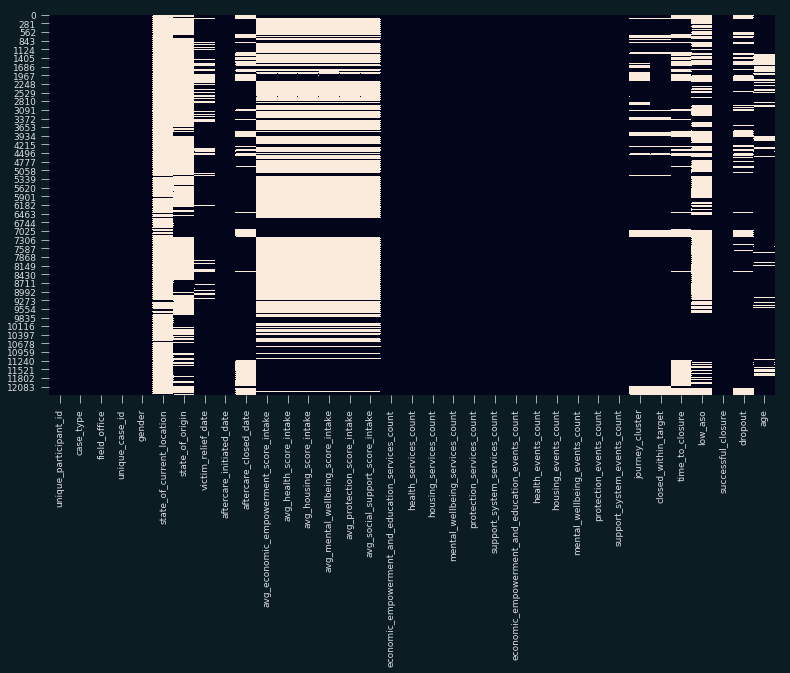

In [141]:
sns.heatmap(model_input.isnull(), cbar=False)

In [142]:
model_input['age'].isna().value_counts()

False    10419
True      1938
Name: age, dtype: int64

### Naïve feature engineering

dates -> #days

In [143]:
date_cols = ['victim_relief_date', 'aftercare_initiated_date', 'aftercare_closed_date']
for col in date_cols:
    model_input[col] = pd.to_datetime(model_input[col])
model_input[date_cols].head()

,victim_relief_date,aftercare_initiated_date,aftercare_closed_date
0,2015-03-24,2015-03-24,2017-02-13
1,2015-03-24,2015-03-24,2017-08-21
2,2015-03-24,2015-03-24,2017-05-16
3,2015-03-24,2015-03-24,2017-09-27
4,2015-03-24,2015-03-24,2017-04-26


In [144]:
model_input['days_btwn_relief_and_intake'] = (model_input['aftercare_initiated_date'] - 
                                              model_input['victim_relief_date']).dt.days
model_input['days_btwn_closure_and_intake'] = (model_input['aftercare_closed_date'] - 
                                              model_input['aftercare_initiated_date']).dt.days

In [145]:
model_input.head()

,unique_participant_id,case_type,field_office,unique_case_id,gender,state_of_current_location,state_of_origin,victim_relief_date,aftercare_initiated_date,aftercare_closed_date,avg_economic_empowerment_score_intake,avg_health_score_intake,avg_housing_score_intake,avg_mental_wellbeing_score_intake,avg_protection_score_intake,avg_social_support_score_intake,economic_empowerment_and_education_services_count,health_services_count,housing_services_count,mental_wellbeing_services_count,protection_services_count,support_system_services_count,economic_empowerment_and_education_events_count,health_events_count,housing_events_count,mental_wellbeing_events_count,protection_events_count,support_system_events_count,journey_cluster,closed_within_target,time_to_closure,low_aso,successful_closure,dropout,age,days_btwn_relief_and_intake,days_btwn_closure_and_intake
0,ACC-3-10,Forced Labor Trafficking,ACC,ACC-3,Male,NaN,NaN,2015-03-24,2015-03-24,2017-02-13,2.0,3.0,2.0,3.0,1.0,1.5,7.0,5.0,0.0,1.0,4.0,3.0,30.0,6.0,14.0,4.0,0.0,0.0,flt_0,0.0,692.0,1.0,1,0.0,12.0,0.0,692.0
1,ACC-3-11,Forced Labor Trafficking,ACC,ACC-3,Male,NaN,NaN,2015-03-24,2015-03-24,2017-08-21,2.0,3.0,2.0,3.0,3.0,2.5,12.0,5.0,0.0,1.0,4.0,1.0,32.0,7.0,14.0,4.0,0.0,0.0,flt_0,0.0,881.0,1.0,1,0.0,21.0,0.0,881.0
2,ACC-3-12,Forced Labor Trafficking,ACC,ACC-3,Male,NaN,NaN,2015-03-24,2015-03-24,2017-05-16,1.0,2.0,1.0,2.0,1.0,1.0,5.0,5.0,0.0,3.0,4.0,1.0,31.0,6.0,13.0,4.0,0.0,0.0,flt_0,0.0,784.0,1.0,1,0.0,29.0,0.0,784.0
3,ACC-3-13,Forced Labor Trafficking,ACC,ACC-3,Male,NaN,NaN,2015-03-24,2015-03-24,2017-09-27,1.0,1.0,1.0,3.0,1.0,1.0,2.0,5.0,0.0,1.0,6.0,0.0,29.0,8.0,16.0,4.0,0.0,0.0,flt_0,0.0,918.0,1.0,1,0.0,14.0,0.0,918.0
4,ACC-3-14,Forced Labor Trafficking,ACC,ACC-3,Male,NaN,NaN,2015-03-24,2015-03-24,2017-04-26,1.0,1.0,1.0,2.0,1.0,1.0,6.0,6.0,0.0,2.0,12.0,2.0,30.0,6.0,15.0,4.0,0.0,0.0,flt_0,0.0,764.0,1.0,1,0.0,14.0,0.0,764.0


In [146]:
model_input = model_input.drop(['days_btwn_closure_and_intake', 
                                'victim_relief_date', 
                                'aftercare_initiated_date',
                                'aftercare_closed_date'
                               ], axis=1)

### Dropping ids,  one-hot encoding

In [147]:
model_input = model_input.drop(['unique_participant_id',
                                'unique_case_id'
                               ], axis=1)

In [148]:
model_input.loc[model_input['age'] > 100, 'age']

1969    2000.0
2711     101.0
2752    1991.0
4294    2001.0
4564     114.0
4668    1992.0
5164    2001.0
Name: age, dtype: float64

In [149]:
model_input = model_input.loc[model_input['age'] < 100]

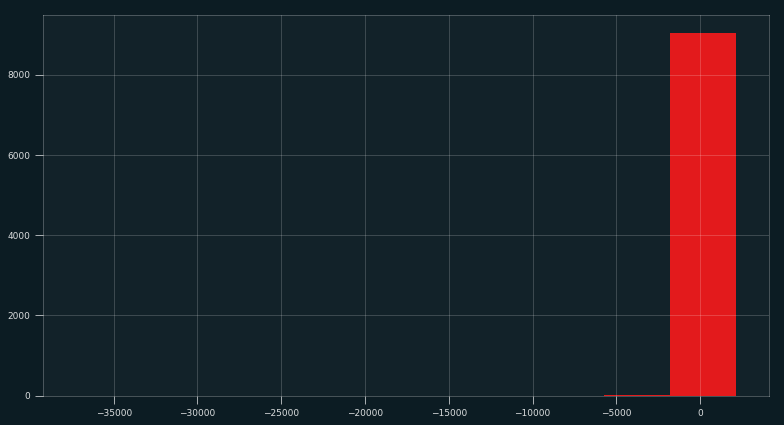

In [150]:
model_input['days_btwn_relief_and_intake'].hist()

In [151]:
model_input = model_input[model_input['days_btwn_relief_and_intake'] > -20000]

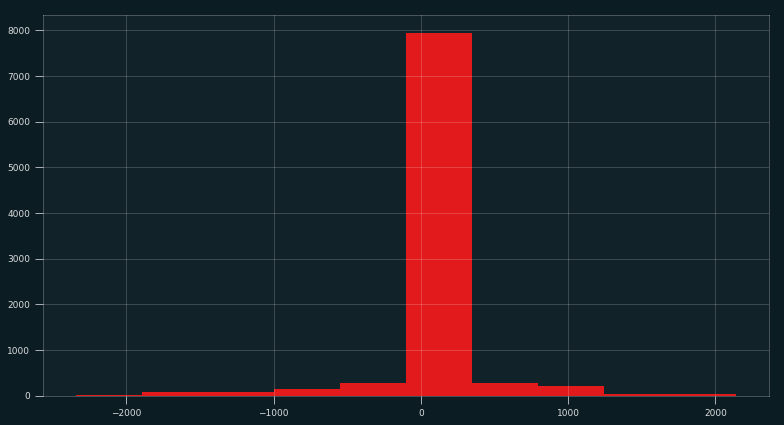

In [152]:
model_input['days_btwn_relief_and_intake'].hist()

In [153]:
model_input_ohe = pd.get_dummies(data=model_input, columns=['case_type', 
                                                            'field_office',
                                                            'gender',
                                                            'state_of_current_location',
                                                            'state_of_origin',
                                                           ], dummy_na=True, drop_first=True)

In [154]:
model_input_ohe.head()

,avg_economic_empowerment_score_intake,avg_health_score_intake,avg_housing_score_intake,avg_mental_wellbeing_score_intake,avg_protection_score_intake,avg_social_support_score_intake,economic_empowerment_and_education_services_count,health_services_count,housing_services_count,mental_wellbeing_services_count,protection_services_count,support_system_services_count,economic_empowerment_and_education_events_count,health_events_count,housing_events_count,mental_wellbeing_events_count,protection_events_count,support_system_events_count,journey_cluster,closed_within_target,time_to_closure,low_aso,successful_closure,dropout,age,days_btwn_relief_and_intake,case_type_CSA,case_type_CSX,case_type_Forced Labor Trafficking,case_type_Land Rights Violations,case_type_OSEC,case_type_Police Abuse of Power,case_type_nan,field_office_BAN,field_office_CEB,field_office_CHN,field_office_CMI,field_office_DOM,field_office_GUA,field_office_GUL,field_office_KLA,field_office_KOL,field_office_LAP,field_office_MAN,field_office_MUM,field_office_NAI,field_office_PAM,field_office_PNH,field_office_nan,gender_Male,gender_nan,state_of_current_location_Karnataka,state_of_current_location_Odisha,state_of_current_location_Tamil Nadu,state_of_current_location_Telangana,state_of_current_location_nan,state_of_origin_Bicol,state_of_origin_Cagayan Valley,state_of_origin_Calabarzon,state_of_origin_Caraga,state_of_origin_Central Luzon,state_of_origin_Central Visayas,state_of_origin_Chang Wat Chiang Mai,state_of_origin_Chhattisgarh,state_of_origin_Chiang Rai,state_of_origin_Cordillera Administrative Region,state_of_origin_Davao Region,state_of_origin_East Java,state_of_origin_Eastern Region,state_of_origin_Eastern Visayas,state_of_origin_Ilocos Region,state_of_origin_Karnataka,state_of_origin_Maharashtra,state_of_origin_Metro Manila,state_of_origin_Northern Mindanao,state_of_origin_Northern Region,state_of_origin_Odisha,state_of_origin_Puerto Plata Province,state_of_origin_Rajasthan,state_of_origin_Tamil Nadu,state_of_origin_Telangana,state_of_origin_nan
0,2.0,3.0,2.0,3.0,1.0,1.5,7.0,5.0,0.0,1.0,4.0,3.0,30.0,6.0,14.0,4.0,0.0,0.0,flt_0,0.0,692.0,1.0,1,0.0,12.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2.0,3.0,2.0,3.0,3.0,2.5,12.0,5.0,0.0,1.0,4.0,1.0,32.0,7.0,14.0,4.0,0.0,0.0,flt_0,0.0,881.0,1.0,1,0.0,21.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1.0,2.0,1.0,2.0,1.0,1.0,5.0,5.0,0.0,3.0,4.0,1.0,31.0,6.0,13.0,4.0,0.0,0.0,flt_0,0.0,784.0,1.0,1,0.0,29.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1.0,1.0,1.0,3.0,1.0,1.0,2.0,5.0,0.0,1.0,6.0,0.0,29.0,8.0,16.0,4.0,0.0,0.0,flt_0,0.0,918.0,1.0,1,0.0,14.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1.0,1.0,1.0,2.0,1.0,1.0,6.0,6.0,0.0,2.0,12.0,2.0,30.0,6.0,15.0,4.0,0.0,0.0,flt_0,0.0,764.0,1.0,1,0.0,14.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


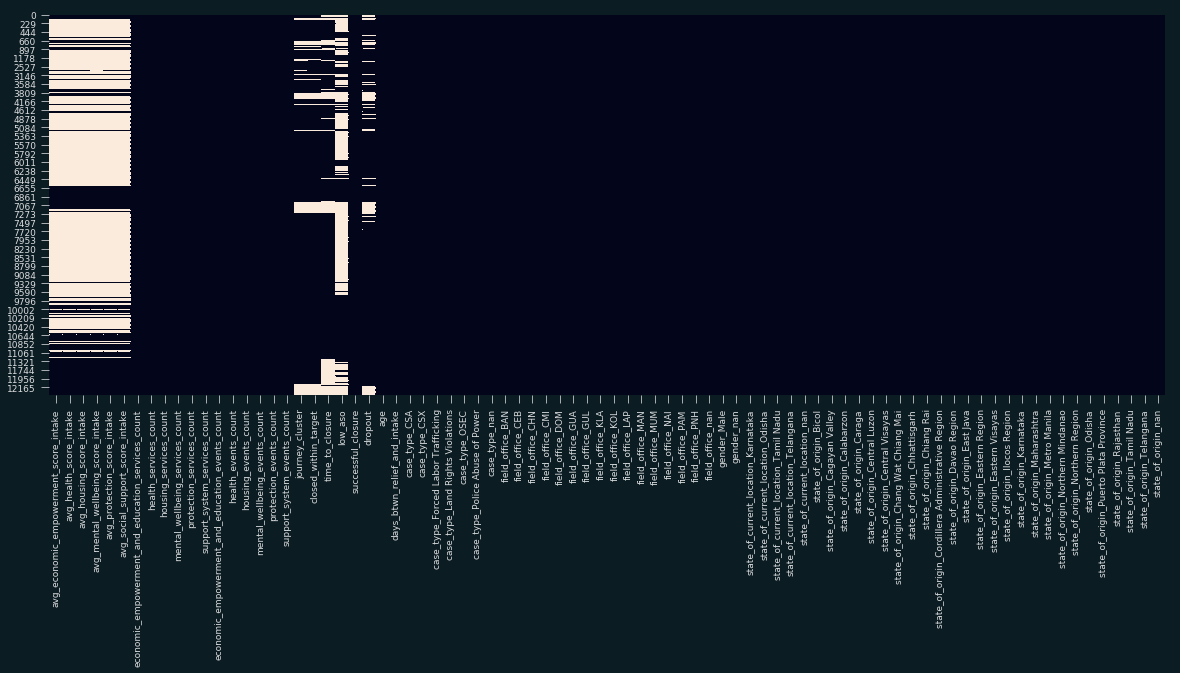

In [155]:
rcParams['figure.figsize'] = 20, 7
sns.heatmap(model_input_ohe.isnull(), cbar=False)

### Dropping `journey_cluster`, `score_intake` related variables

In [156]:
score_intake_cols = ['avg_economic_empowerment_score_intake',
'avg_health_score_intake',
'avg_housing_score_intake',
'avg_mental_wellbeing_score_intake',
'avg_protection_score_intake',
'avg_social_support_score_intake']

In [157]:
model_input_ohe = model_input_ohe.drop(score_intake_cols + ['journey_cluster'], axis=1)

In [158]:
model_input_ohe['age'].isna().value_counts()

False    9042
Name: age, dtype: int64

In [159]:
model_input_ohe['days_btwn_relief_and_intake'].isna().value_counts()

False    9042
Name: days_btwn_relief_and_intake, dtype: int64

In [160]:
model_input_ohe =\
    model_input_ohe[model_input_ohe['age'].notnull() &\
                                   model_input_ohe['days_btwn_relief_and_intake'].notnull()
                                  ]

In [161]:
model_input_ohe.shape

(9042, 75)

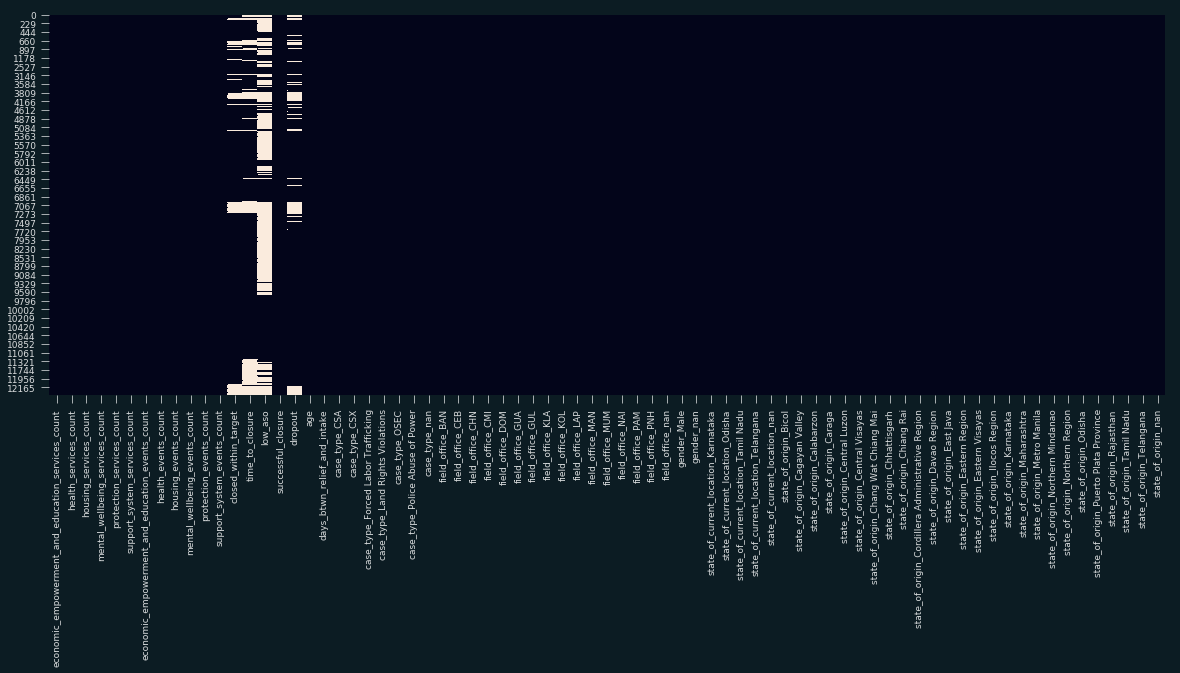

In [162]:
rcParams['figure.figsize'] = 20, 7
sns.heatmap(model_input_ohe.isnull(), cbar=False)

## Dealing with outliers

In [163]:
targets = ['closed_within_target',
             'time_to_closure',
             'low_aso',
             'successful_closure',
             'dropout']

In [164]:
numeric_cols_after_ohe = []
for col in numeric_cols:
    if col in model_input_ohe.columns.tolist() and col not in targets:
        numeric_cols_after_ohe.append(col)
numeric_cols_after_ohe

['economic_empowerment_and_education_services_count',
 'health_services_count',
 'housing_services_count',
 'mental_wellbeing_services_count',
 'protection_services_count',
 'support_system_services_count',
 'economic_empowerment_and_education_events_count',
 'health_events_count',
 'housing_events_count',
 'mental_wellbeing_events_count',
 'protection_events_count',
 'support_system_events_count',
 'age']

In [165]:
for col in numeric_cols_after_ohe:
    q = model_input_ohe[col].quantile(0.99)
    min_q = model_input_ohe[col].min()
    print(col, q, min_q)
#     df[df["col"] < q]

economic_empowerment_and_education_services_count 6.0 0.0
health_services_count 8.0 0.0
housing_services_count 4.0 0.0
mental_wellbeing_services_count 6.5900000000001455 0.0
protection_services_count 11.0 0.0
support_system_services_count 6.0 0.0
economic_empowerment_and_education_events_count 15.0 0.0
health_events_count 11.0 0.0
housing_events_count 7.0 0.0
mental_wellbeing_events_count 45.0 0.0
protection_events_count 9.0 0.0
support_system_events_count 29.0 0.0
age 67.0 1.0


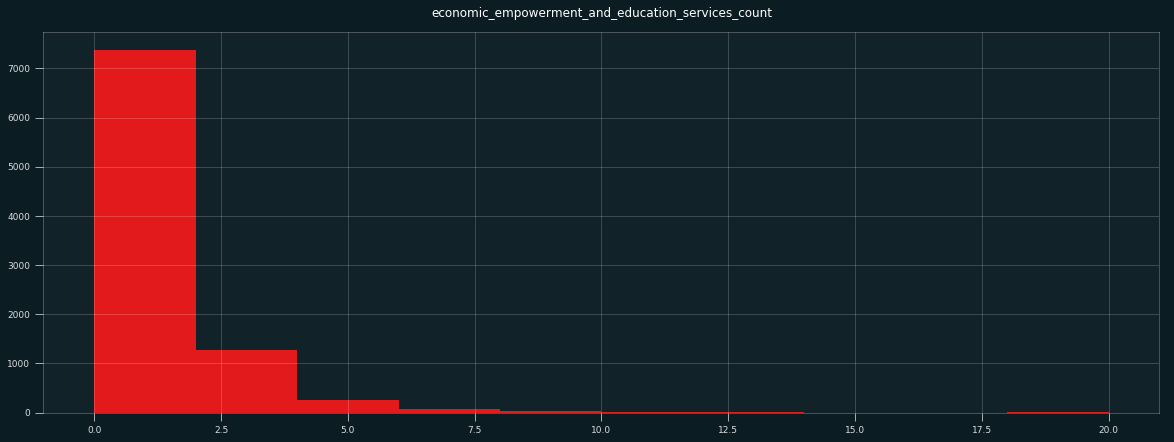

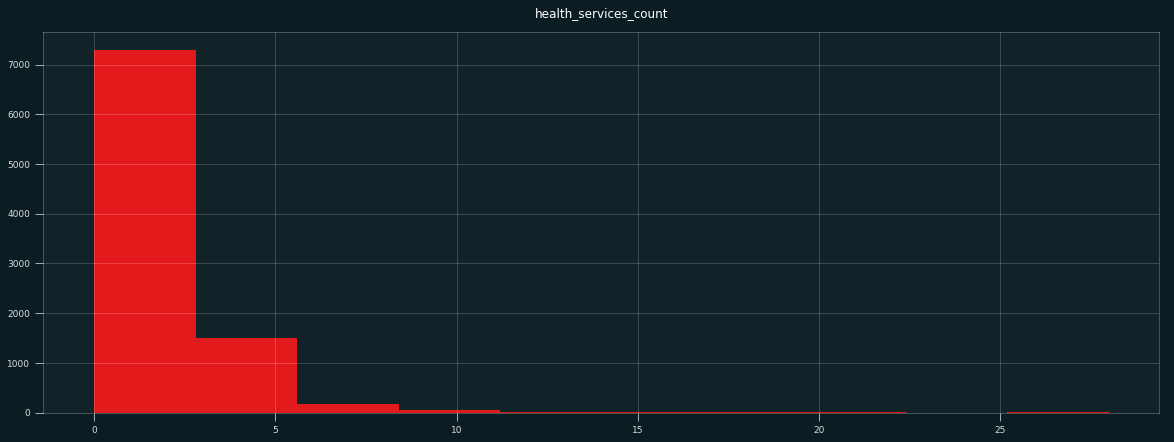

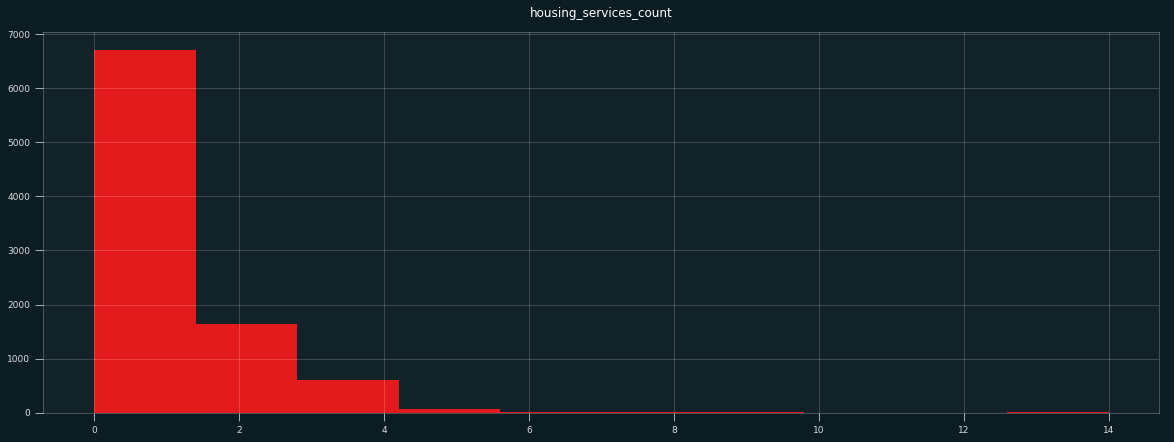

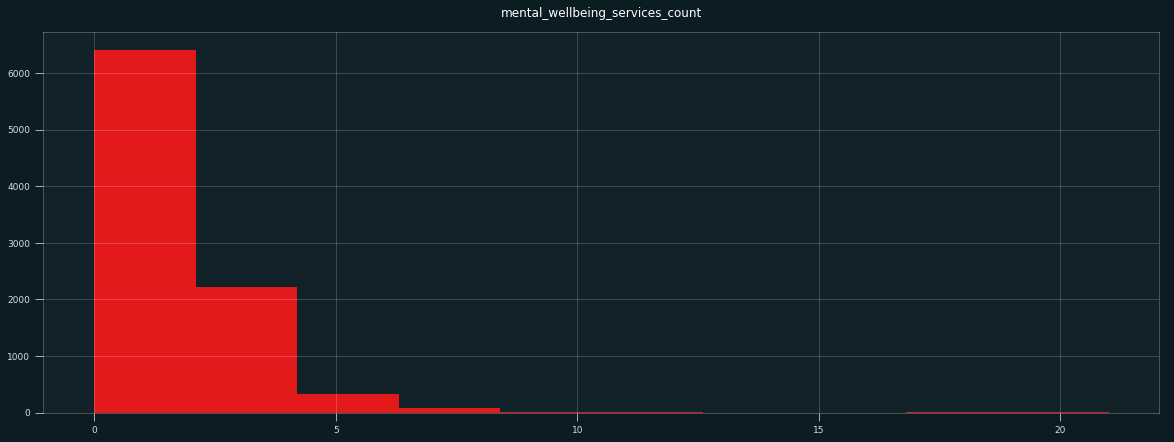

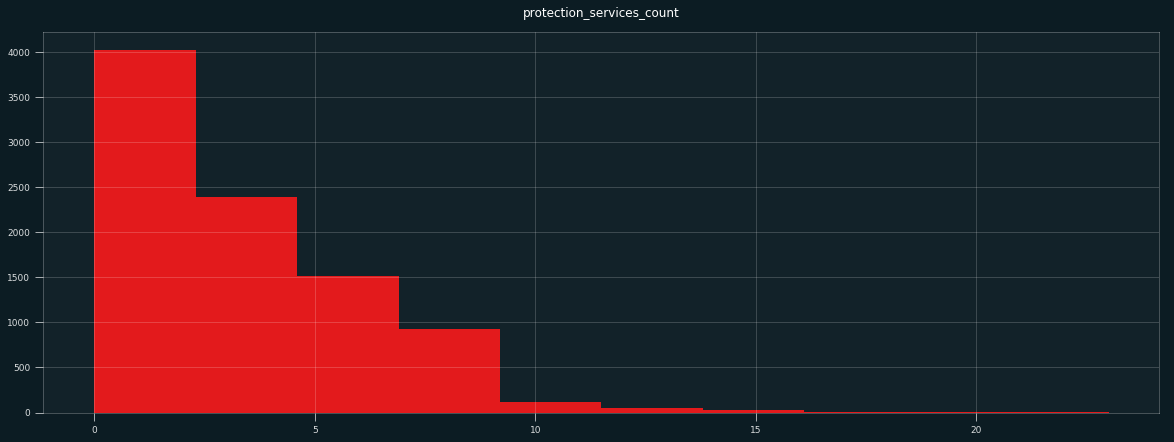

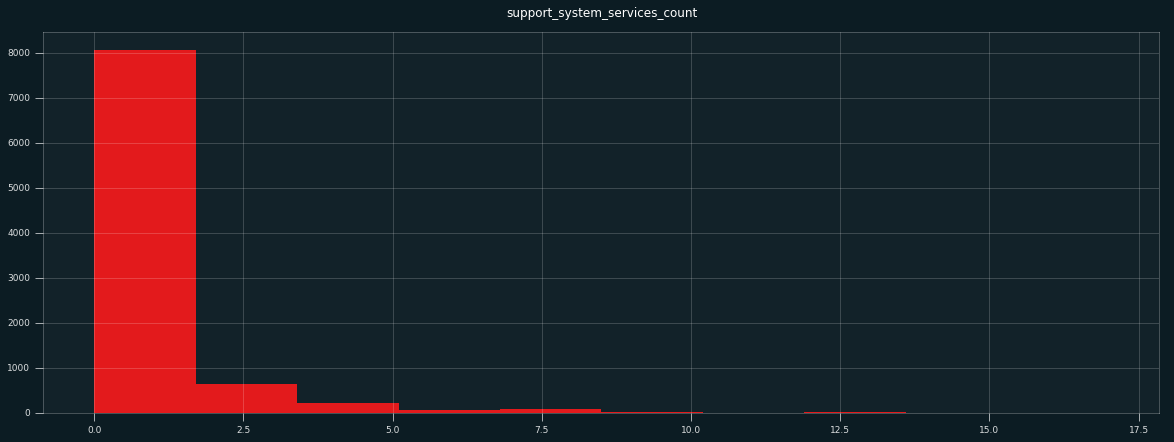

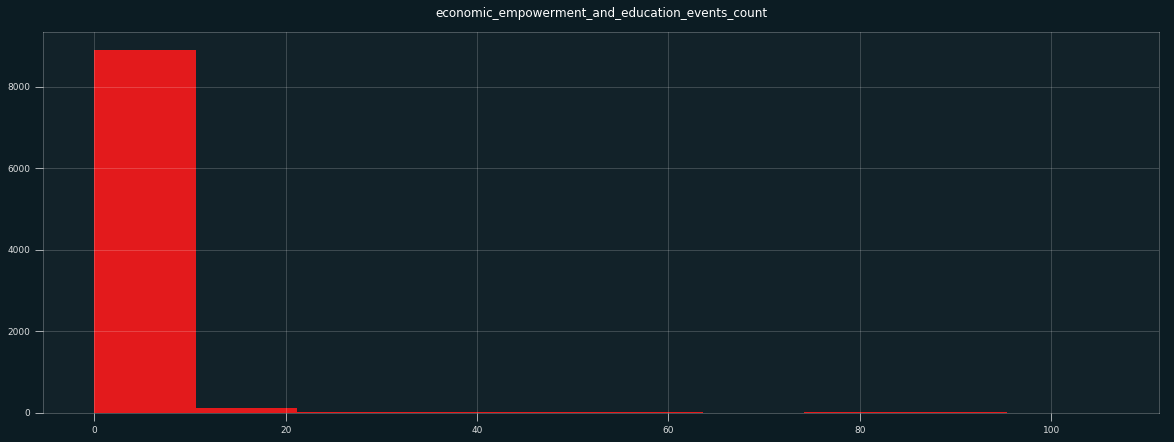

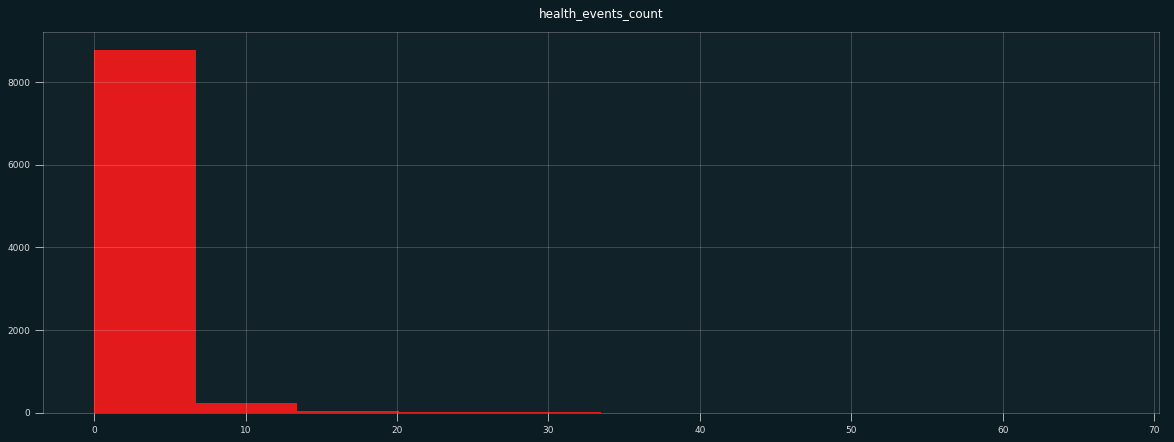

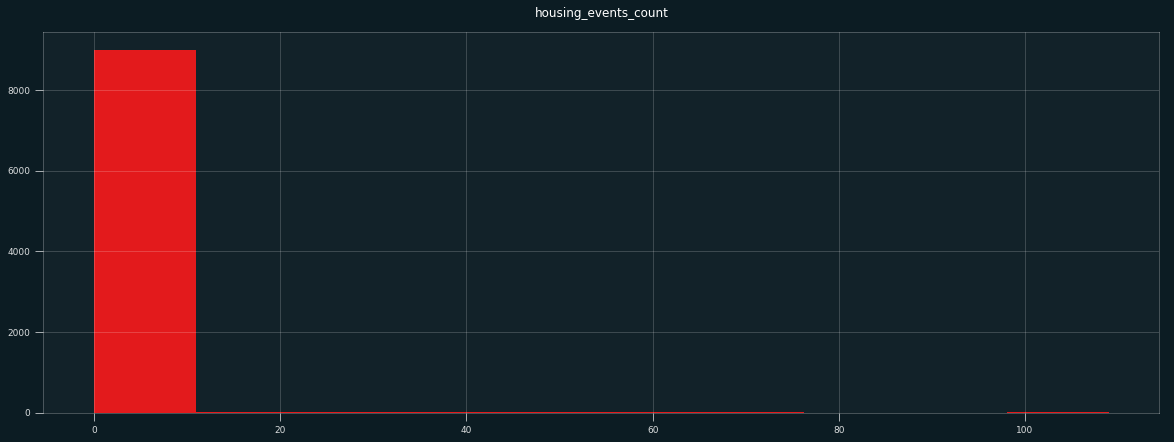

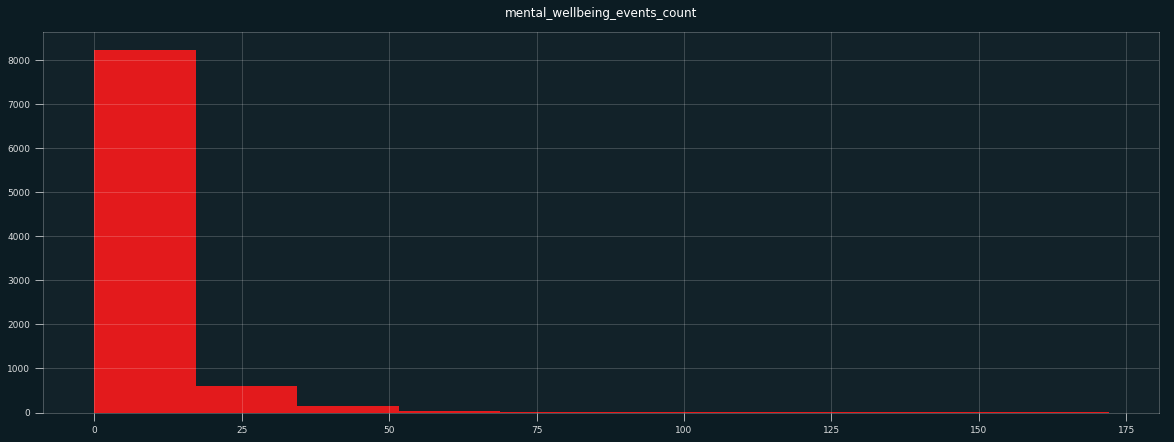

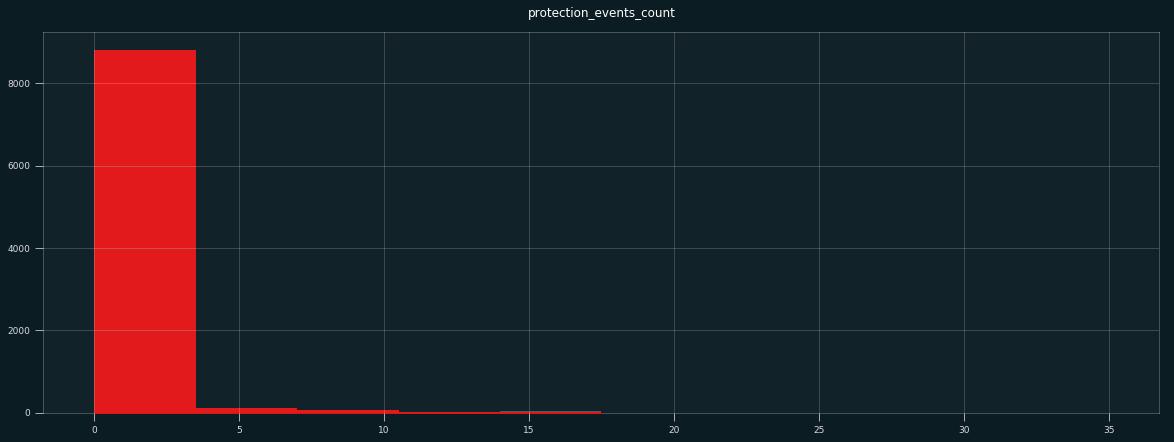

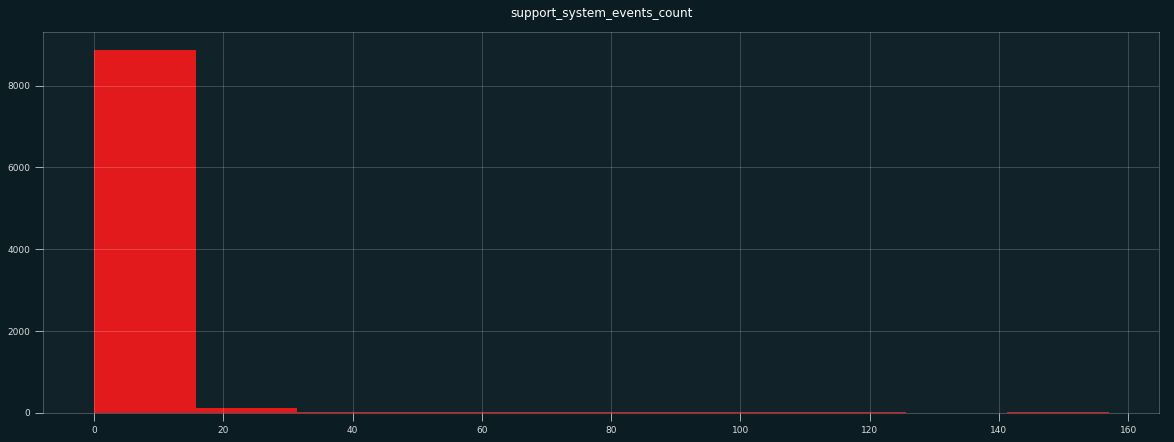

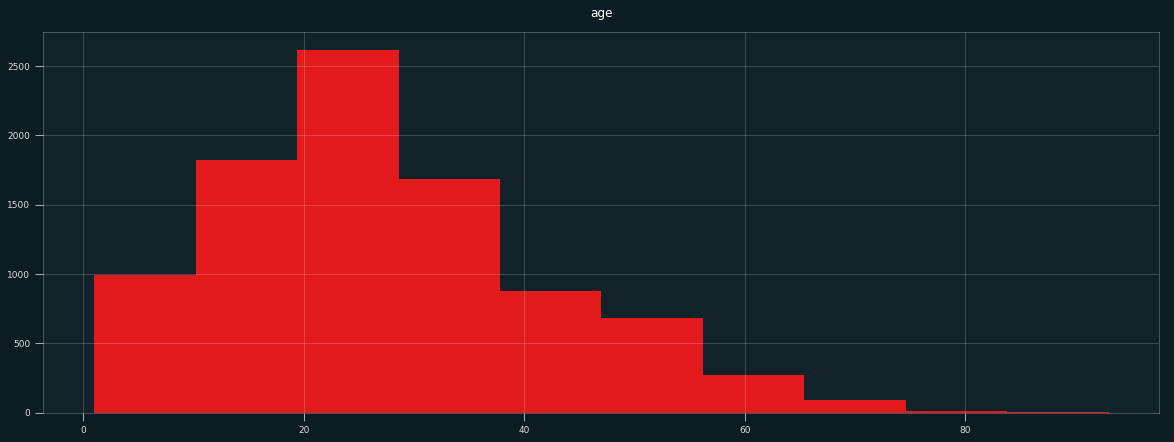

In [166]:
for col in numeric_cols_after_ohe:
    plt.figure()
    model_input_ohe[col].hist()
    plt.title(col)

## Normalising `count`-based variables

In [167]:
count_cols = []
for col in model_input_ohe.columns.tolist():
    if 'count' in col:
        count_cols.append(col)

In [168]:
count_cols

['economic_empowerment_and_education_services_count',
 'health_services_count',
 'housing_services_count',
 'mental_wellbeing_services_count',
 'protection_services_count',
 'support_system_services_count',
 'economic_empowerment_and_education_events_count',
 'health_events_count',
 'housing_events_count',
 'mental_wellbeing_events_count',
 'protection_events_count',
 'support_system_events_count']

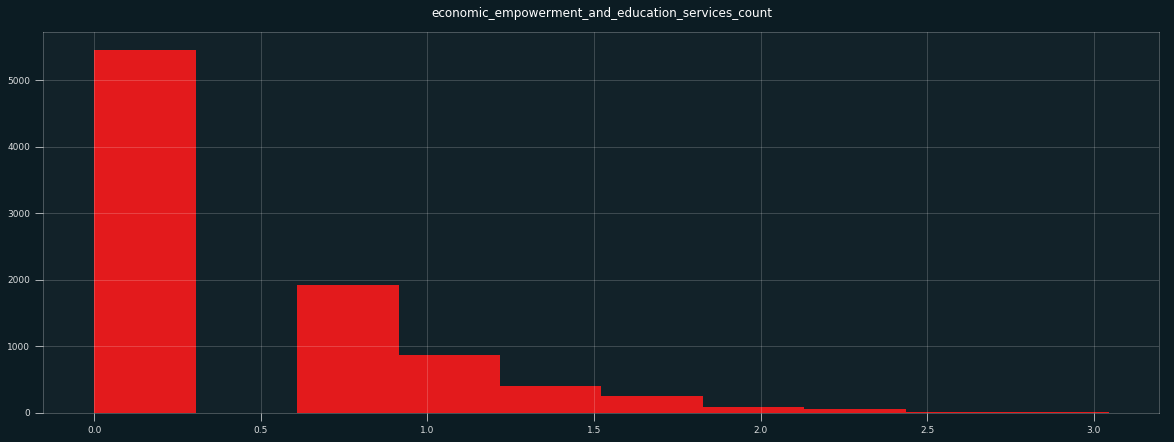

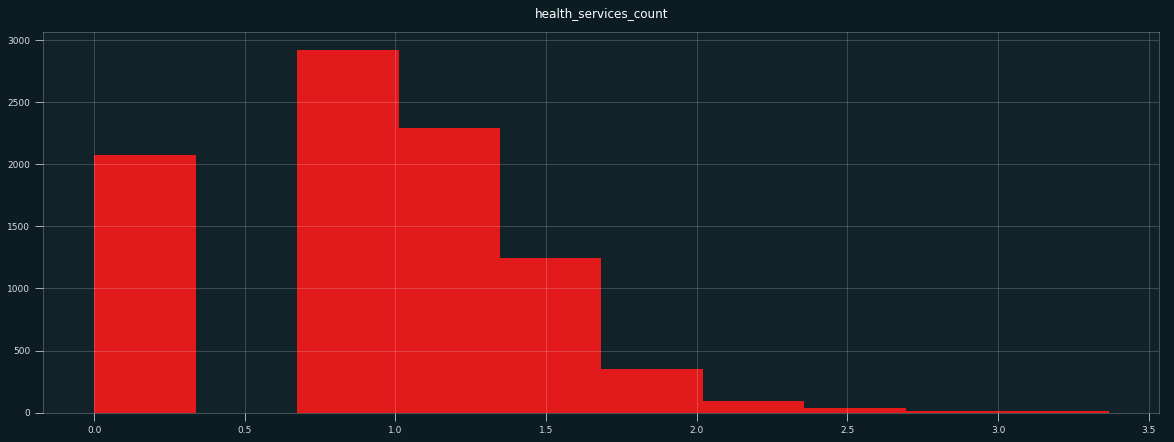

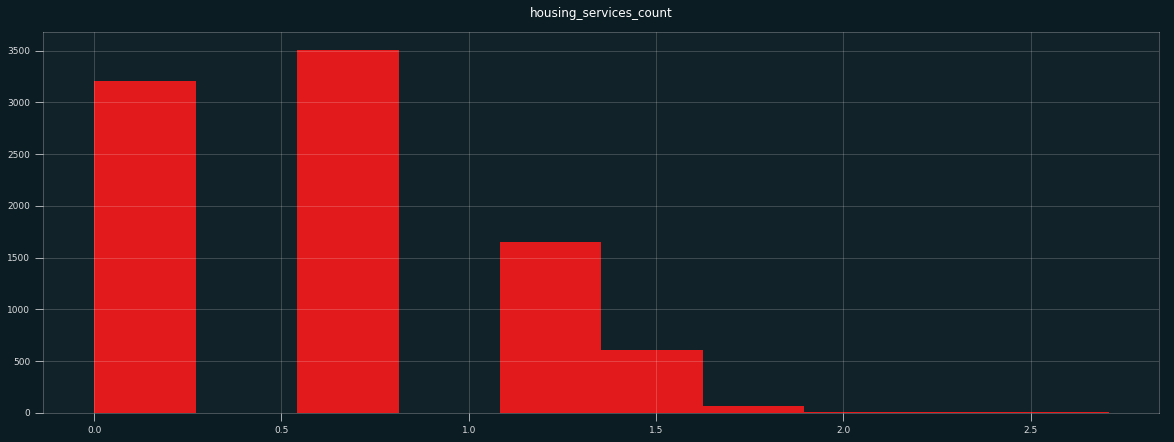

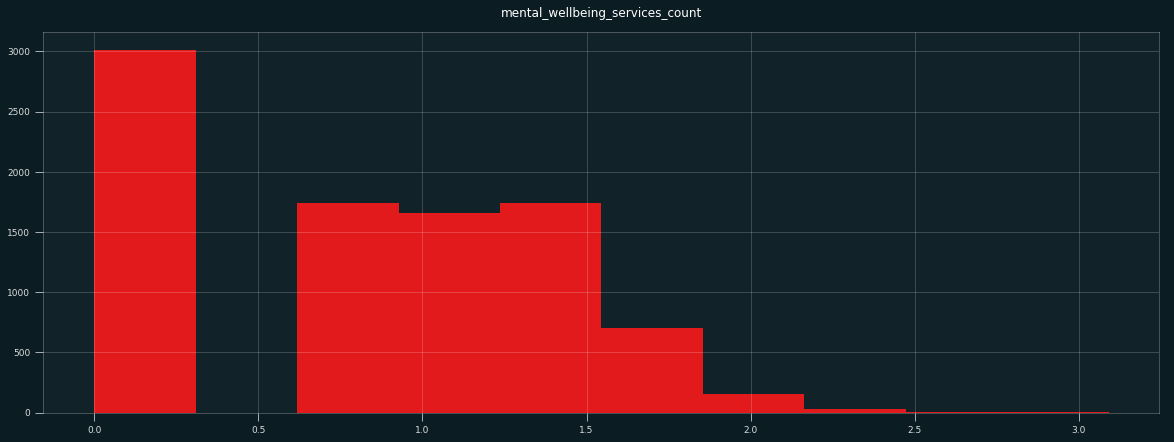

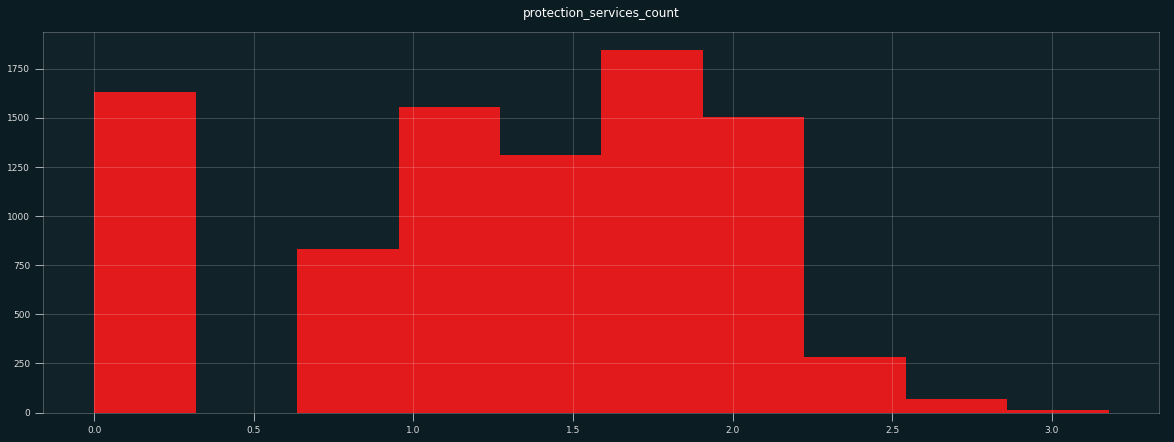

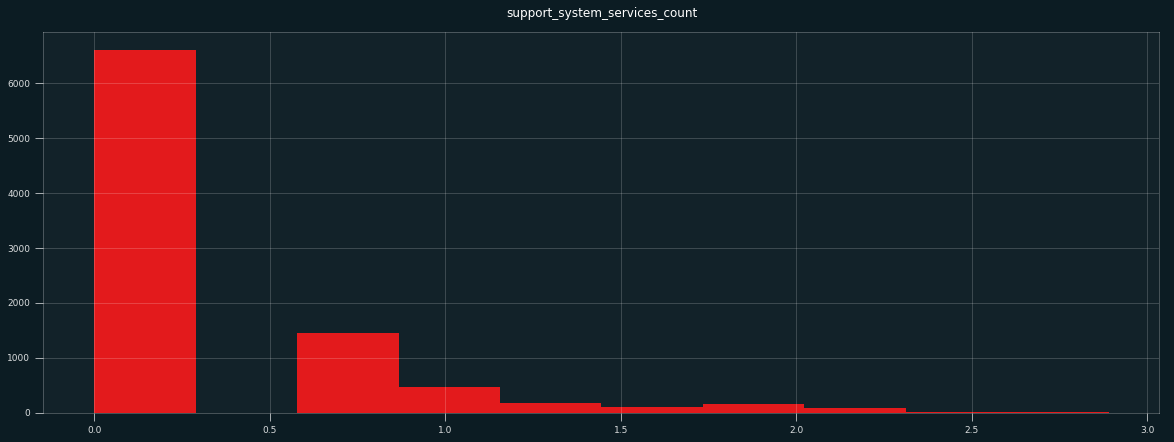

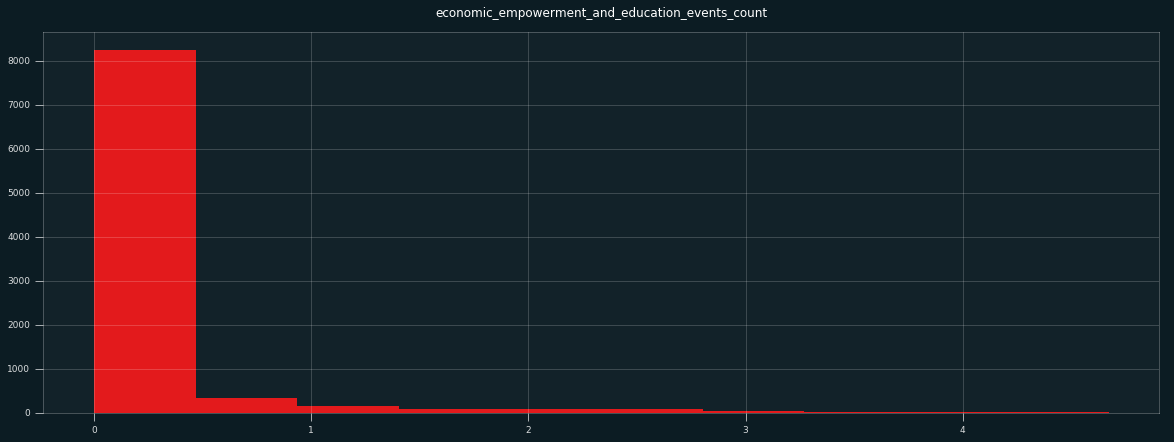

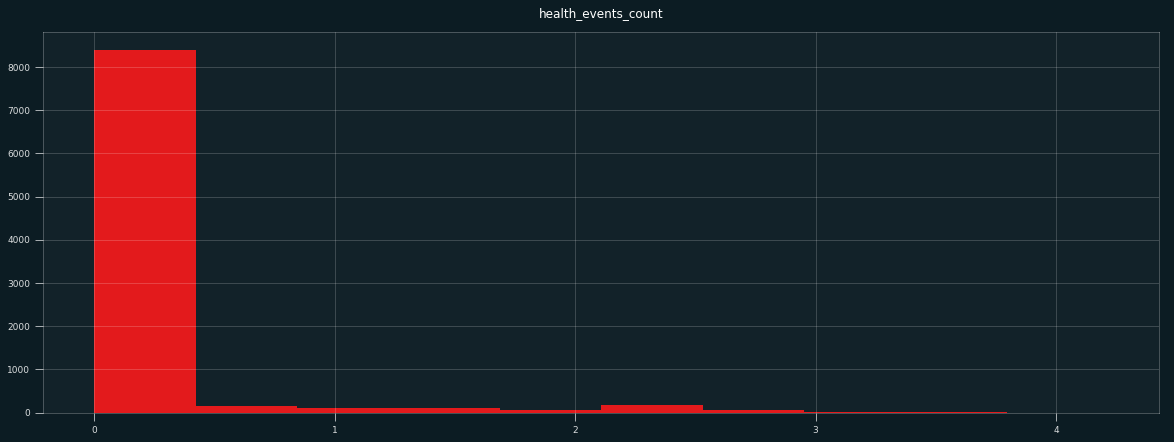

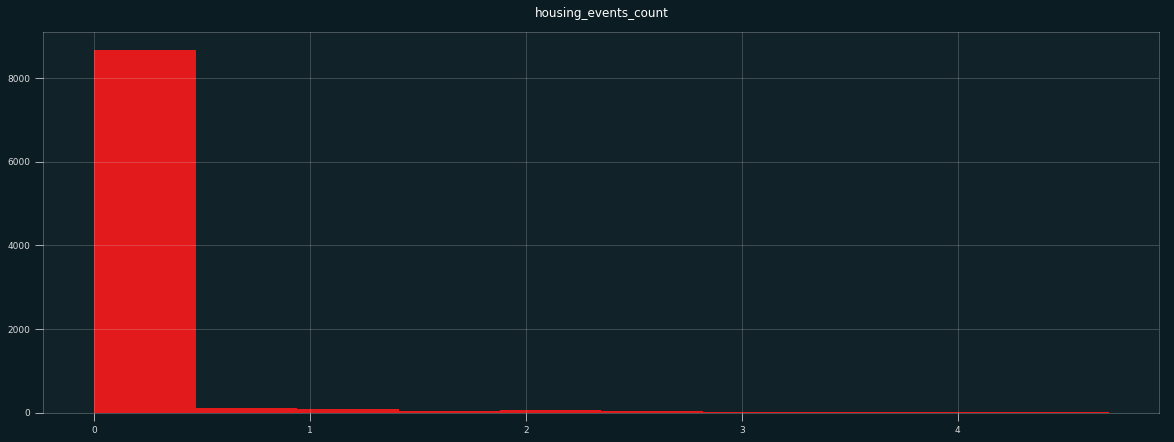

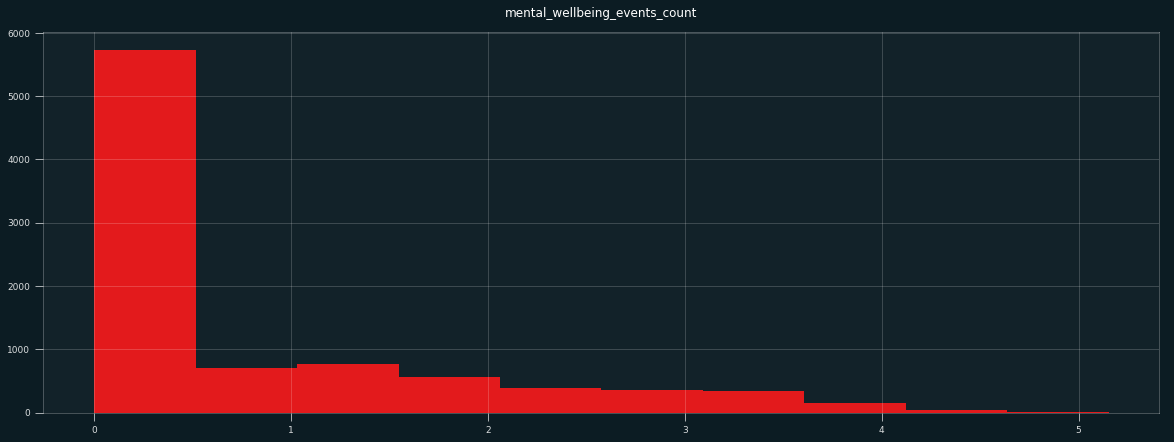

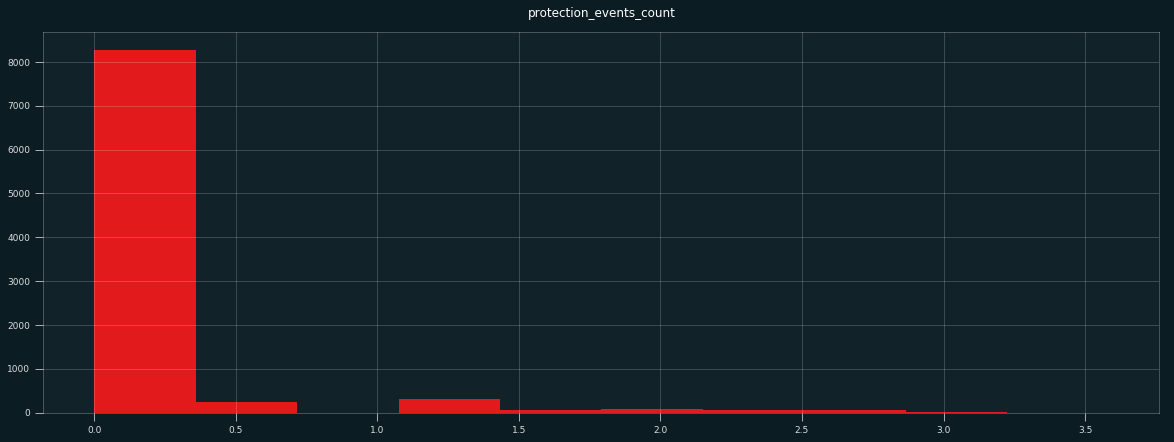

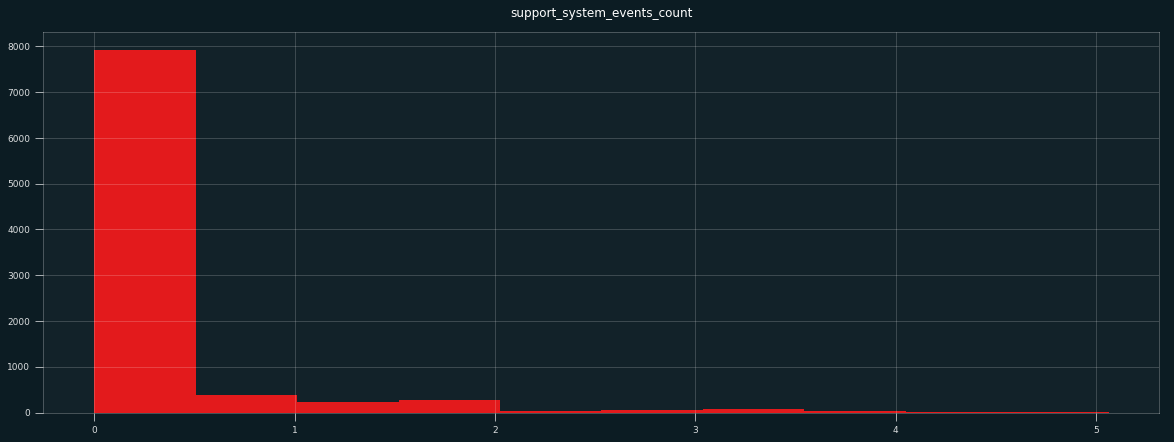

In [169]:
model_input_ohe_log = model_input_ohe.copy()
for col in count_cols:
    model_input_ohe_log[col] = np.log1p(model_input_ohe_log[col])
    plt.figure()
    model_input_ohe_log[col].hist()
    plt.title(col)

In [170]:
model_input_ohe_without_target = model_input_ohe_log.drop(targets, axis=1)

# Modeling `dropout`

### Decision trees

In [171]:
from sklearn.tree import DecisionTreeClassifier

In [172]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [173]:
targets

['closed_within_target',
 'time_to_closure',
 'low_aso',
 'successful_closure',
 'dropout']

In [174]:
# Splitting the data into training and testing sets - a frequent test set size is 20%-30% of the original dataset
target_col = 'dropout'
y = model_input_ohe[target_col].fillna(0)
X = model_input_ohe_without_target.values


In [175]:
# Decision tree
def get_feature_importance(X, y):

    X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.2)

    clf = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=20, 
                                 min_samples_leaf=10, max_features=None)

    clf.fit(X_train, y_train)
    pred_clf = clf.predict(X_test)
    proba_clf = clf.predict_proba(X_test)
    features_log = pd.DataFrame(clf.feature_importances_, index = model_input_ohe_without_target.columns.tolist(), 
                                columns = ['Importance'])
    features_log = features_log.sort_values(by='Importance', ascending=True)
    return features_log

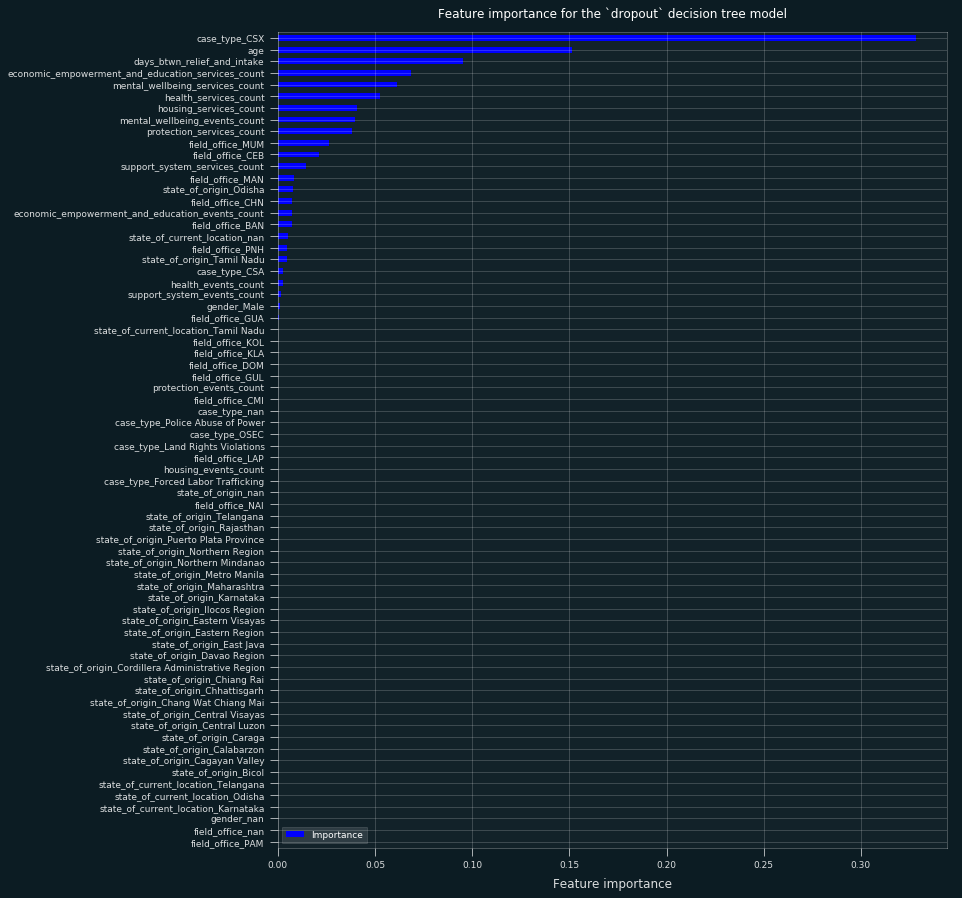

In [176]:
# Plot feature importance
features_log = get_feature_importance(X, y)
    
features_log.plot(kind='barh', figsize=(12,15), color = 'blue')
plt.xlabel('Feature importance')
plt.title('Feature importance for the `dropout` decision tree model')
plt.show()

### Repeated splits

In [177]:
splits = 20
features_logs = features_log
for i in range(splits):
    new_features_log = get_feature_importance(X, y)
    features_logs['Importance_' + str(i)] = new_features_log['Importance']

In [178]:
features_logs

,Importance,Importance_0,Importance_1,Importance_2,Importance_3,Importance_4,Importance_5,Importance_6,Importance_7,Importance_8,Importance_9,Importance_10,Importance_11,Importance_12,Importance_13,Importance_14,Importance_15,Importance_16,Importance_17,Importance_18,Importance_19
field_office_PAM,0.000000,0.000000,0.000000,0.000000,0.000000,0.000748,0.000000,0.000000,0.000684,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
field_office_nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
gender_nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
state_of_current_location_Karnataka,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
state_of_current_location_Odisha,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
state_of_current_location_Telangana,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
state_of_origin_Bicol,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
state_of_origin_Cagayan Valley,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
state_of_origin_Calabarzon,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
state_of_origin_Caraga,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Text(0.5,1,'Bootsrapped feature importances')

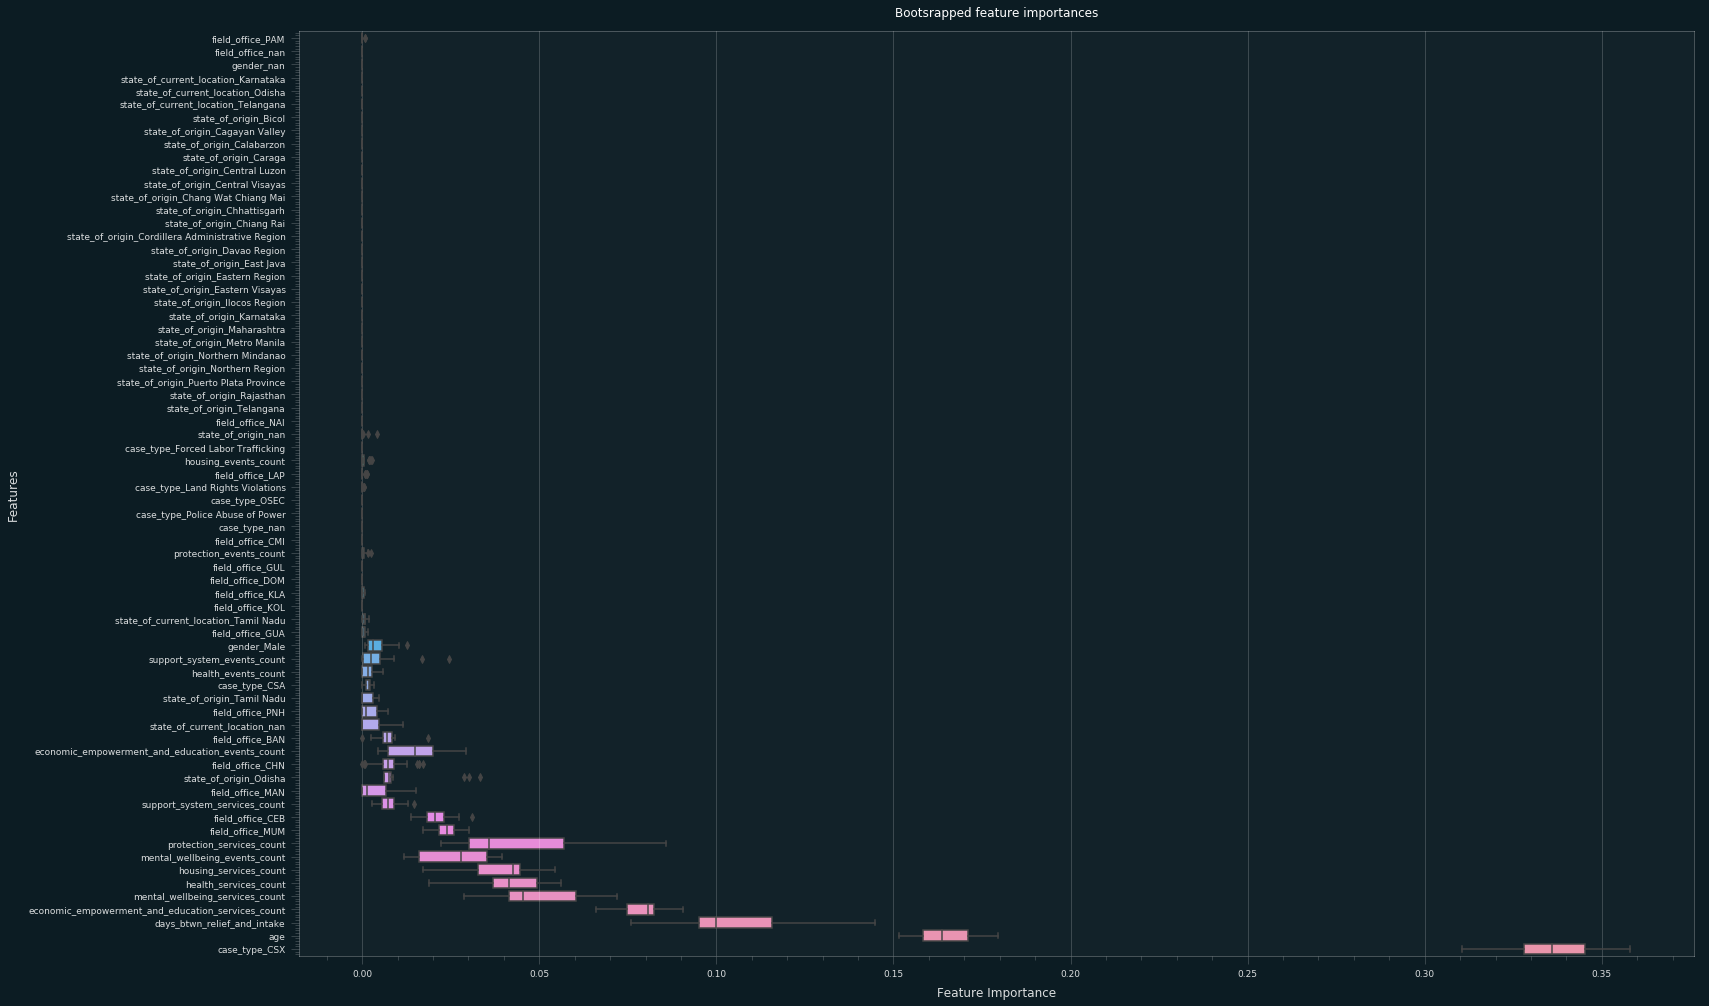

In [179]:
figsize=(25, 17)
y_label = 'Features'
fig, ax = plt.subplots(figsize=figsize)
sns.boxplot(data=features_logs.transpose(), orient="h")
plt.xlabel('Feature Importance')
plt.ylabel(y_label)
plt.title('Bootsrapped feature importances')

In [180]:
top5_features = [
    'case_type_CSX', 
    'age', 
    'days_btwn_relief_and_intake', 
    'economic_empowerment_and_education_services_count',
    'protection_services_count',
    'health_services_count',
    'mental_welbeing_services_count'
]

In [181]:
features_logs_important = features_log.loc[features_log.index in top5_features]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Text(0.5,1,'Bootsrapped feature importances')

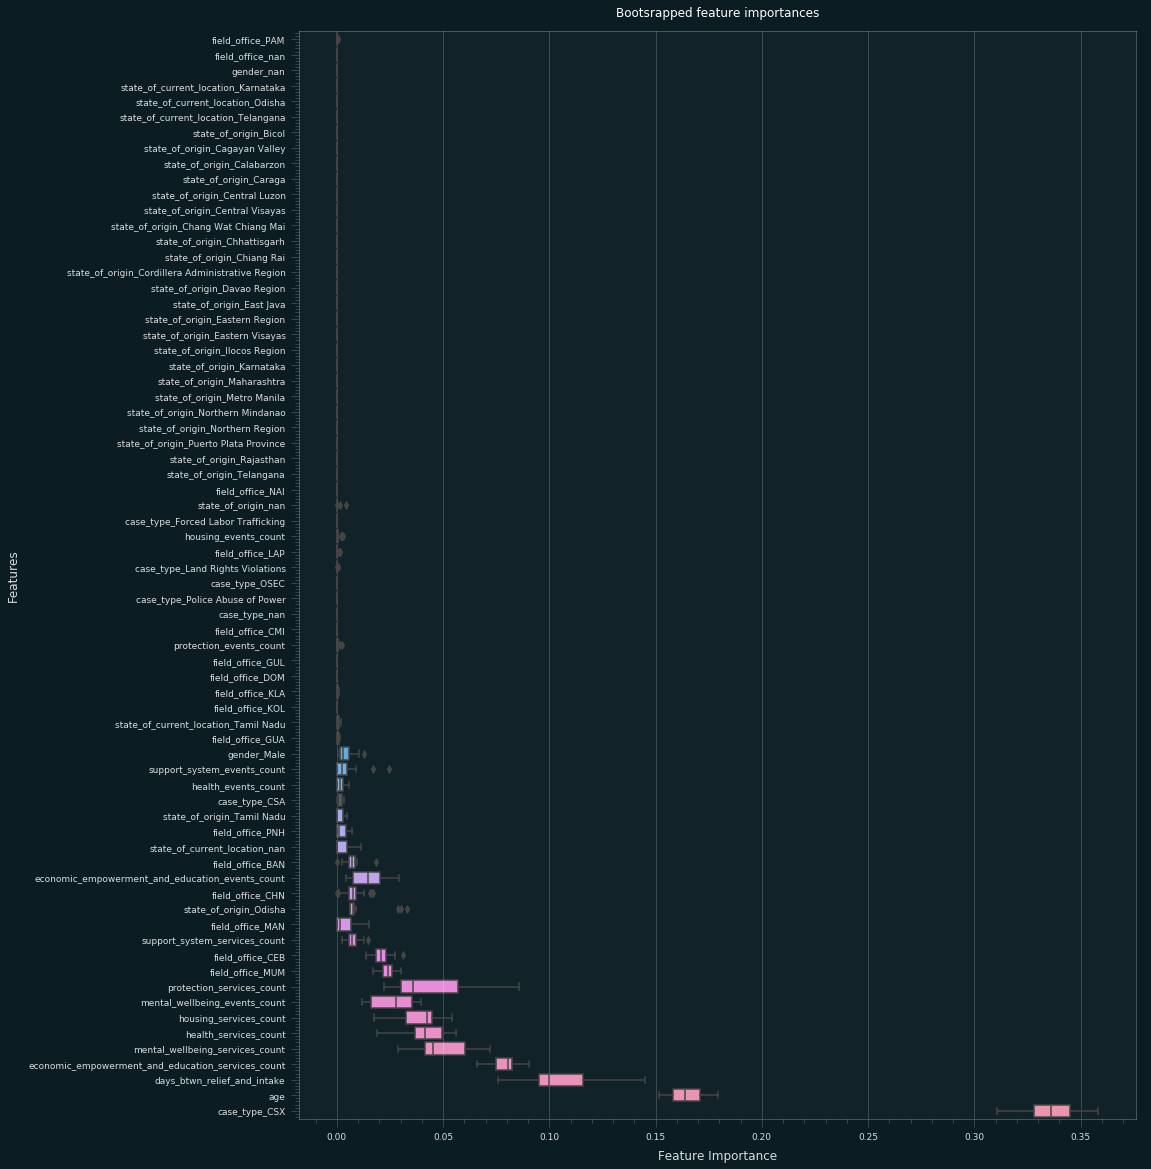

In [182]:
figsize=(15, 20)
y_label = 'Features'
fig, ax = plt.subplots(figsize=figsize)
sns.boxplot(data=features_logs.transpose(), orient="h")
plt.xlabel('Feature Importance')
plt.ylabel(y_label)
plt.title('Bootsrapped feature importances')

### Bivariate pairplots based on most important features

<Figure size 1080x432 with 0 Axes>

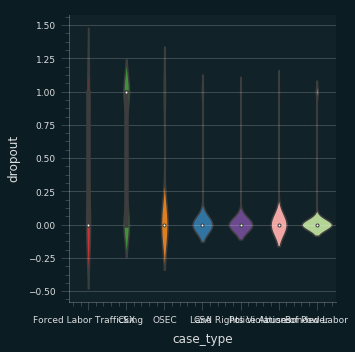

In [115]:
plt.figure(figsize=(15,6))
# Draw a nested boxplot to show bills by day and time
sns.catplot(x='case_type', y=target_col, data=model_input, kind="violin")

Text(0.5,1,'Frequency of dropout by case type')

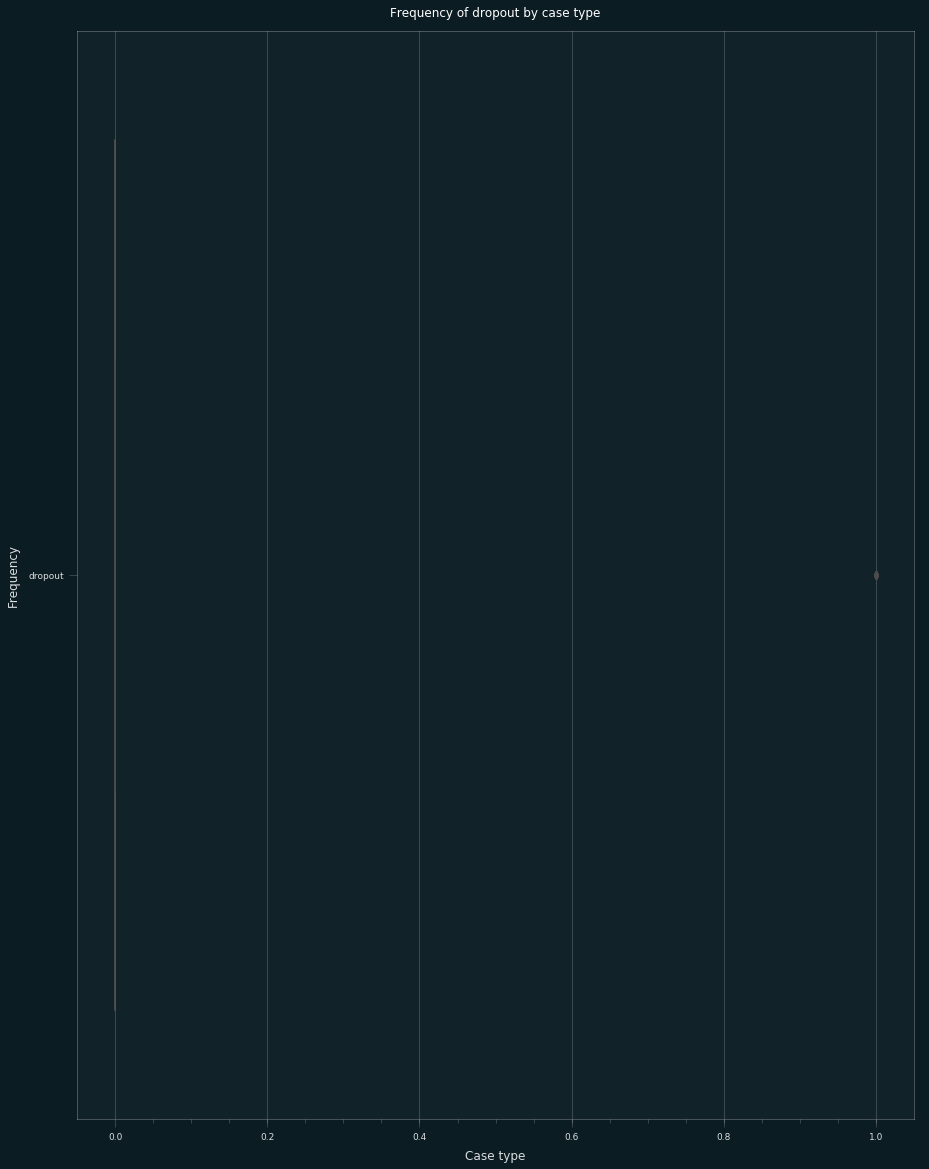

In [106]:
figsize=(20, 15)
y_label = 'Frequency'
fig, ax = plt.subplots(figsize=figsize)
sns.boxplot(data=model_input.loc[:, ['case_type', target_col]], orient="h")
plt.xlabel('Case type')
plt.ylabel(y_label)
plt.title('Frequency of dropout by case type')

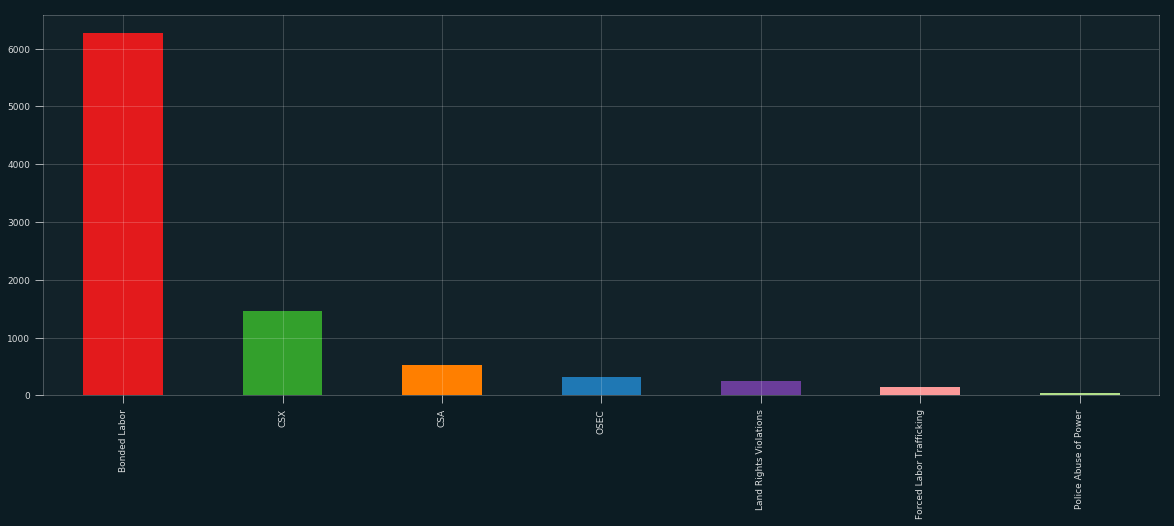

In [184]:
model_input.case_type.value_counts().plot('bar')

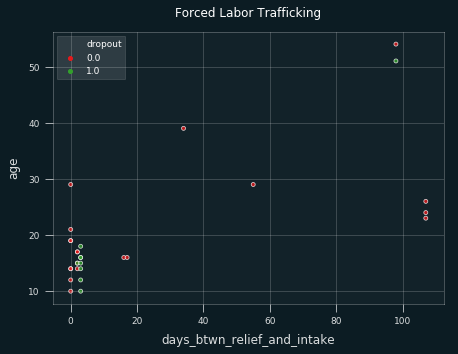

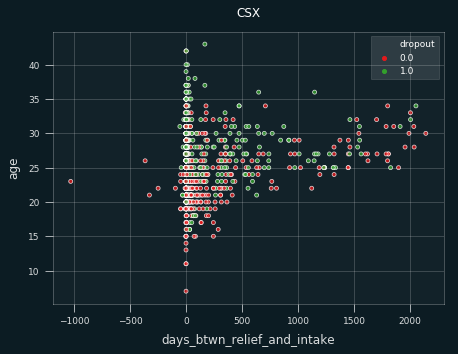

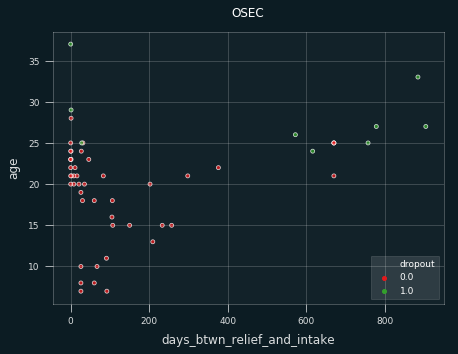

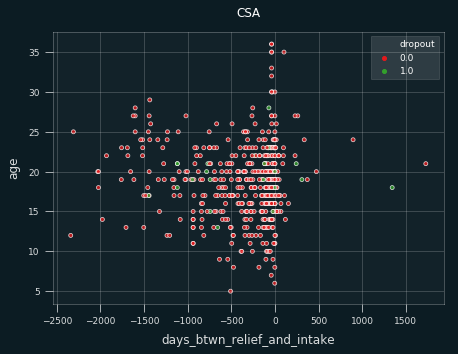

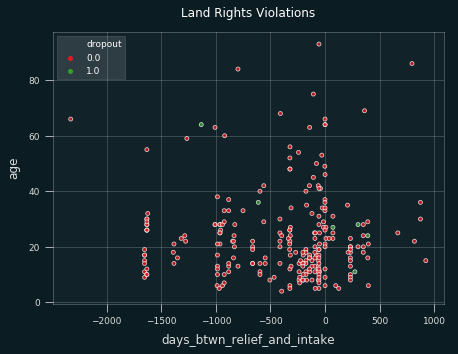

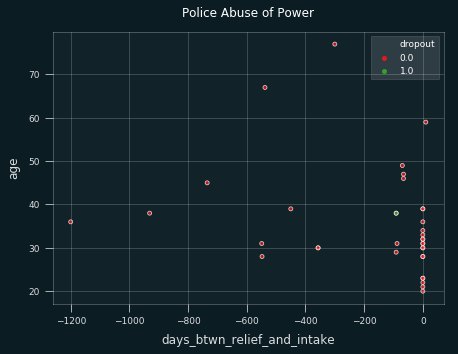

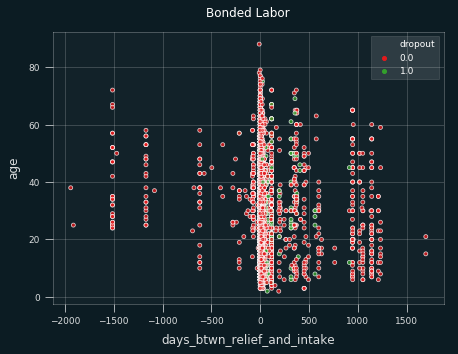

In [185]:
for case_type in model_input.case_type.unique():
    df_subset = model_input[model_input['case_type']==case_type]
    plt.figure(figsize=(7,5))
    sns.scatterplot(
        y='age', x="days_btwn_relief_and_intake",
        hue='dropout',
        data=df_subset,
        legend="full",
        alpha=0.8,
    )
    plt.title(case_type)


/Users/viktoriia_oliinyk/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/viktoriia_oliinyk/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<Figure size 504x360 with 0 Axes>

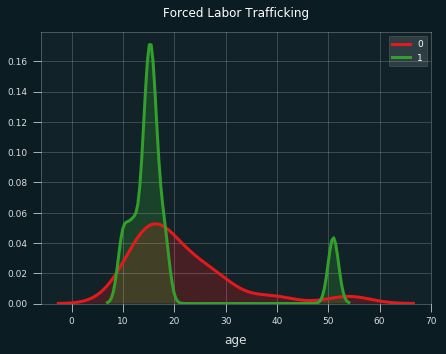

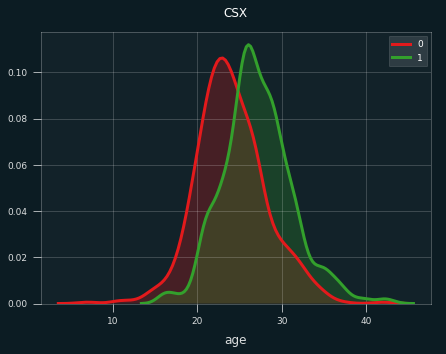

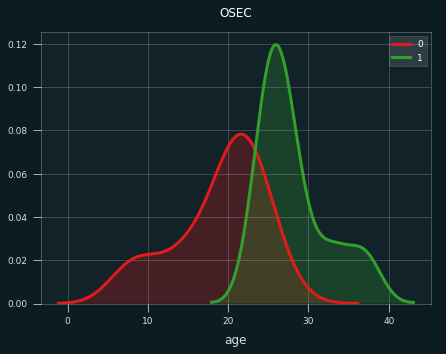

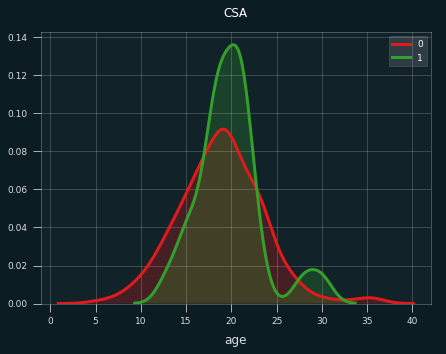

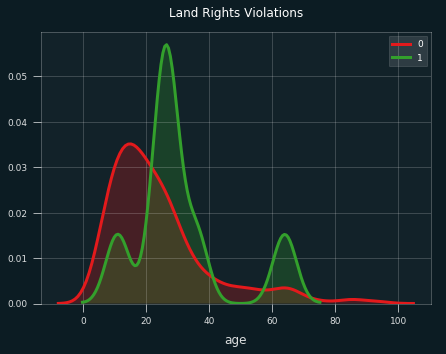

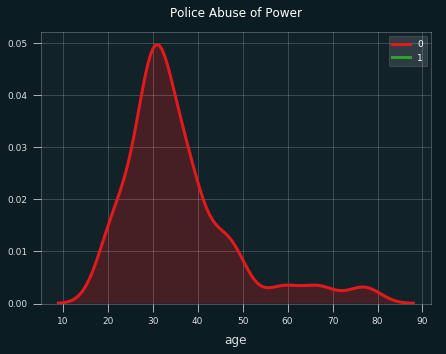

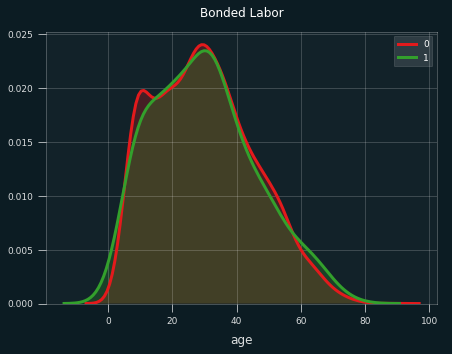

In [186]:
plt.figure(figsize=(7,5))
for case_type in model_input.case_type.unique():
    plt.figure(figsize=(7,5))
    df_subset = model_input[model_input['case_type']==case_type]
    for label in [0, 1]:
        subset = df_subset[df_subset[target_col] == label]
        sns.distplot(subset['age'], hist = False, kde = True,
                     kde_kws = {'shade': True, 'linewidth': 3}, 
                      label = label)
        plt.title(case_type)

In [187]:
import fairai as fairai

- __elift__: $\frac{\mathbb{P}(Y=1|S=1)}{\mathbb{P}(Y=1)}$
- __impact ratio__: $\frac{\mathbb{P}(Y=1|S=1)}{\mathbb{P}(Y=1|S=0)}$
- __mean difference__:  $\mathbb{E}(Y|S=0) - \mathbb{E}(Y|S=1)$

In [188]:
from fairai.detect import discrimination_measures as dm
from fairai.viz.plots import plot_metrics

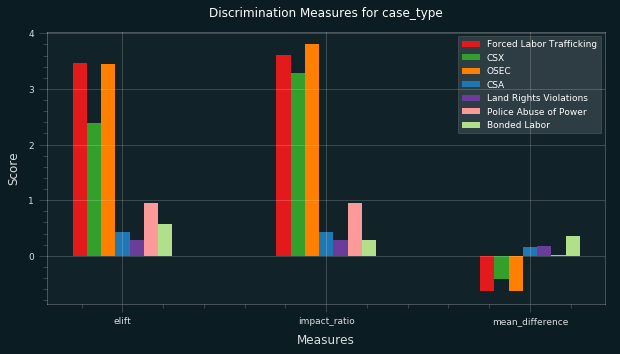

In [189]:
observed_values = model_input[target_col].astype(bool)
sensitive_attr = model_input['case_type']
summary = dm.summary(observed_values, sensitive_attr)
summary_pd = pd.DataFrame(summary).round(3)

fig_ax = plt.subplots(figsize = (10, 5))
plot_metrics(summary, 'Measures', 'Score', 
         'Discrimination Measures for ' + 'case_type' , fig_and_ax=fig_ax)

In [216]:
df = model_input.groupby(['case_type']).sum()


case_type
Bonded Labor                335.0
CSA                          26.0
CSX                         604.0
Forced Labor Trafficking      9.0
Land Rights Violations        7.0
OSEC                          9.0
Police Abuse of Power         1.0
Name: dropout, dtype: float64

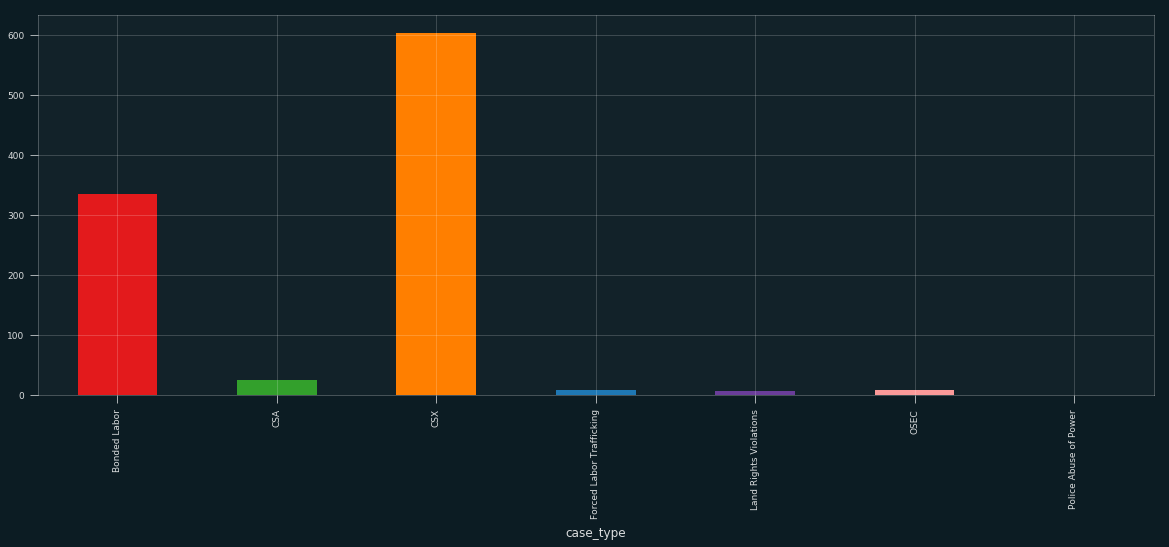

In [219]:
df['dropout'].plot(kind='bar')

In [190]:
model_input.head()

,case_type,field_office,gender,state_of_current_location,state_of_origin,avg_economic_empowerment_score_intake,avg_health_score_intake,avg_housing_score_intake,avg_mental_wellbeing_score_intake,avg_protection_score_intake,avg_social_support_score_intake,economic_empowerment_and_education_services_count,health_services_count,housing_services_count,mental_wellbeing_services_count,protection_services_count,support_system_services_count,economic_empowerment_and_education_events_count,health_events_count,housing_events_count,mental_wellbeing_events_count,protection_events_count,support_system_events_count,journey_cluster,closed_within_target,time_to_closure,low_aso,successful_closure,dropout,age,days_btwn_relief_and_intake
0,Forced Labor Trafficking,ACC,Male,NaN,NaN,2.0,3.0,2.0,3.0,1.0,1.5,7.0,5.0,0.0,1.0,4.0,3.0,30.0,6.0,14.0,4.0,0.0,0.0,flt_0,0.0,692.0,1.0,1,0.0,12.0,0.0
1,Forced Labor Trafficking,ACC,Male,NaN,NaN,2.0,3.0,2.0,3.0,3.0,2.5,12.0,5.0,0.0,1.0,4.0,1.0,32.0,7.0,14.0,4.0,0.0,0.0,flt_0,0.0,881.0,1.0,1,0.0,21.0,0.0
2,Forced Labor Trafficking,ACC,Male,NaN,NaN,1.0,2.0,1.0,2.0,1.0,1.0,5.0,5.0,0.0,3.0,4.0,1.0,31.0,6.0,13.0,4.0,0.0,0.0,flt_0,0.0,784.0,1.0,1,0.0,29.0,0.0
3,Forced Labor Trafficking,ACC,Male,NaN,NaN,1.0,1.0,1.0,3.0,1.0,1.0,2.0,5.0,0.0,1.0,6.0,0.0,29.0,8.0,16.0,4.0,0.0,0.0,flt_0,0.0,918.0,1.0,1,0.0,14.0,0.0
4,Forced Labor Trafficking,ACC,Male,NaN,NaN,1.0,1.0,1.0,2.0,1.0,1.0,6.0,6.0,0.0,2.0,12.0,2.0,30.0,6.0,15.0,4.0,0.0,0.0,flt_0,0.0,764.0,1.0,1,0.0,14.0,0.0


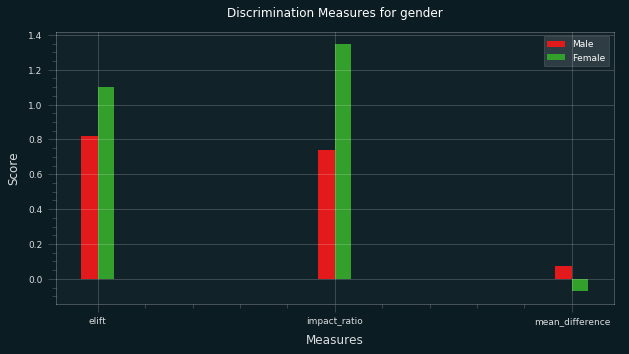

In [191]:
observed_values = model_input[target_col].astype(bool)
sensitive_attr = model_input['gender']
summary = dm.summary(observed_values, sensitive_attr)
summary_pd = pd.DataFrame(summary).round(3)

fig_ax = plt.subplots(figsize = (10, 5))
plot_metrics(summary, 'Measures', 'Score', 
         'Discrimination Measures for ' + 'gender' , fig_and_ax=fig_ax)

# Clustering

### First, scaling numeric variables and PCA-ing

In [192]:
from sklearn.preprocessing import StandardScaler

In [193]:
scaler = StandardScaler()

In [194]:
model_input_ohe_without_target_scaled = model_input_ohe_without_target.copy()
model_input_ohe_without_target_scaled.loc[:, numeric_cols_after_ohe] =\
                                scaler.fit_transform(model_input_ohe_without_target_scaled.loc[:, numeric_cols_after_ohe])

In [195]:
model_input_ohe_without_target_scaled.head()

,economic_empowerment_and_education_services_count,health_services_count,housing_services_count,mental_wellbeing_services_count,protection_services_count,support_system_services_count,economic_empowerment_and_education_events_count,health_events_count,housing_events_count,mental_wellbeing_events_count,protection_events_count,support_system_events_count,age,days_btwn_relief_and_intake,case_type_CSA,case_type_CSX,case_type_Forced Labor Trafficking,case_type_Land Rights Violations,case_type_OSEC,case_type_Police Abuse of Power,case_type_nan,field_office_BAN,field_office_CEB,field_office_CHN,field_office_CMI,field_office_DOM,field_office_GUA,field_office_GUL,field_office_KLA,field_office_KOL,field_office_LAP,field_office_MAN,field_office_MUM,field_office_NAI,field_office_PAM,field_office_PNH,field_office_nan,gender_Male,gender_nan,state_of_current_location_Karnataka,state_of_current_location_Odisha,state_of_current_location_Tamil Nadu,state_of_current_location_Telangana,state_of_current_location_nan,state_of_origin_Bicol,state_of_origin_Cagayan Valley,state_of_origin_Calabarzon,state_of_origin_Caraga,state_of_origin_Central Luzon,state_of_origin_Central Visayas,state_of_origin_Chang Wat Chiang Mai,state_of_origin_Chhattisgarh,state_of_origin_Chiang Rai,state_of_origin_Cordillera Administrative Region,state_of_origin_Davao Region,state_of_origin_East Java,state_of_origin_Eastern Region,state_of_origin_Eastern Visayas,state_of_origin_Ilocos Region,state_of_origin_Karnataka,state_of_origin_Maharashtra,state_of_origin_Metro Manila,state_of_origin_Northern Mindanao,state_of_origin_Northern Region,state_of_origin_Odisha,state_of_origin_Puerto Plata Province,state_of_origin_Rajasthan,state_of_origin_Tamil Nadu,state_of_origin_Telangana,state_of_origin_nan
0,3.086369,1.703404,-1.187594,-0.130666,0.521121,2.272439,6.701082,3.838280,7.235762,0.818893,-0.275478,-0.316296,-1.080431,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,3.975879,1.703404,-1.187594,-0.130666,0.521121,0.865335,6.827868,4.118917,7.235762,0.818893,-0.275478,-0.316296,-0.448085,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2.559300,1.703404,-1.187594,0.978109,0.521121,0.865335,6.765466,3.838280,7.046900,0.818893,-0.275478,-0.316296,0.114001,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1.289369,1.703404,-1.187594,-0.130666,0.988103,-0.541768,6.634587,4.366456,7.578385,0.818893,-0.275478,-0.316296,-0.939909,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2.841723,1.973358,-1.187594,0.517926,1.847253,1.688438,6.701082,3.838280,7.412430,0.818893,-0.275478,-0.316296,-0.939909,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [196]:
from sklearn.decomposition import PCA

In [202]:
X = model_input_ohe_without_target_scaled.loc[:, top5_features].values

/Users/viktoriia_oliinyk/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [200]:
model_input_ohe_without_target_scaled = model_input_ohe_without_target_scaled.fillna(0)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

In [67]:
print(pca.explained_variance_)

[8.15209329e+04 3.70703409e+00]


In [68]:
projected = pca.transform(X)

In [69]:
model_input_ohe_pca = model_input_ohe.copy()
model_input_ohe_pca['pc_1'] = projected[:, 0]
model_input_ohe_pca['pc_2'] = projected[:, 1]

In [70]:
model_input_ohe_pca.head()

,economic_empowerment_and_education_services_count,health_services_count,housing_services_count,mental_wellbeing_services_count,protection_services_count,support_system_services_count,economic_empowerment_and_education_events_count,health_events_count,housing_events_count,mental_wellbeing_events_count,protection_events_count,support_system_events_count,closed_within_target,time_to_closure,low_aso,successful_closure,dropout,age,days_btwn_relief_and_intake,case_type_CSA,case_type_CSX,case_type_Forced Labor Trafficking,case_type_Land Rights Violations,case_type_OSEC,case_type_Police Abuse of Power,case_type_nan,field_office_BAN,field_office_CEB,field_office_CHN,field_office_CMI,field_office_DOM,field_office_GUA,field_office_GUL,field_office_KLA,field_office_KOL,field_office_LAP,field_office_MAN,field_office_MUM,field_office_NAI,field_office_PAM,field_office_PNH,field_office_nan,gender_Male,gender_nan,state_of_current_location_Karnataka,state_of_current_location_Odisha,state_of_current_location_Tamil Nadu,state_of_current_location_Telangana,state_of_current_location_nan,state_of_origin_Bicol,state_of_origin_Busia County,state_of_origin_Cagayan Valley,state_of_origin_Calabarzon,state_of_origin_Caraga,state_of_origin_Central Luzon,state_of_origin_Central Visayas,state_of_origin_Chang Wat Chiang Mai,state_of_origin_Chhattisgarh,state_of_origin_Chiang Rai,state_of_origin_Cordillera Administrative Region,state_of_origin_Davao Region,state_of_origin_East Java,state_of_origin_Eastern Region,state_of_origin_Eastern Visayas,state_of_origin_Ilocos Region,state_of_origin_Kakamega County,state_of_origin_Kampong Thom Province,state_of_origin_Karnataka,state_of_origin_Kiambu County,state_of_origin_Maharashtra,state_of_origin_Metro Manila,state_of_origin_Nairobi County,state_of_origin_Northern Mindanao,state_of_origin_Northern Region,state_of_origin_Odisha,state_of_origin_Puerto Plata Province,state_of_origin_Rajasthan,state_of_origin_Tamil Nadu,state_of_origin_Telangana,state_of_origin_nan,pc_1,pc_2
10,0.0,6.0,0.0,9.0,13.0,0.0,15.0,9.0,10.0,0.0,0.0,0.0,0.0,NaN,NaN,0,NaN,13.0,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-131.241847,5.630781
11,0.0,6.0,0.0,5.0,8.0,0.0,15.0,9.0,10.0,1.0,0.0,0.0,0.0,NaN,NaN,0,NaN,10.0,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-131.242792,5.459185
12,0.0,3.0,0.0,10.0,9.0,0.0,15.0,8.0,11.0,0.0,0.0,1.0,0.0,NaN,NaN,0,NaN,9.0,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-131.242774,5.649290
13,0.0,4.0,0.0,5.0,12.0,0.0,15.0,7.0,10.0,0.0,0.0,0.0,0.0,NaN,NaN,0,NaN,11.0,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-131.242632,5.159148
14,0.0,4.0,0.0,5.0,9.0,0.0,15.0,7.0,10.0,0.0,0.0,0.0,0.0,NaN,NaN,0,NaN,14.0,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-131.242875,5.033534


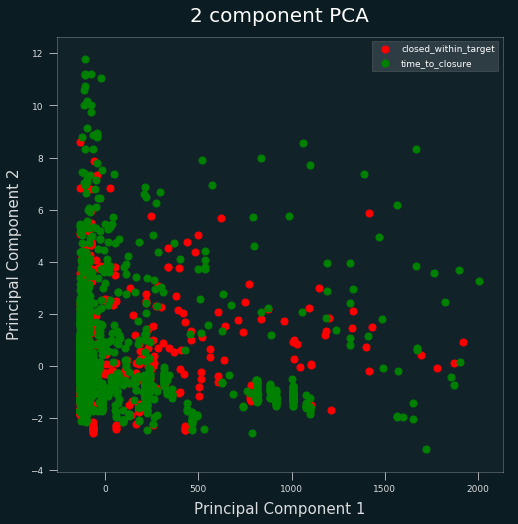

In [71]:
target_col = 'dropout'

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
target_labels = [1, 0]
colors = ['r', 'g']
for target, color in zip(target_labels, colors):
    indicesToKeep = model_input_ohe_pca[target_col] == target
    ax.scatter(model_input_ohe_pca.loc[indicesToKeep, 'pc_1']
               , model_input_ohe_pca.loc[indicesToKeep, 'pc_2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
